Входные данные представляют собой наборы признаков по клиентам на первое число каждого месяца за 1,5 года (sample данных).
Целевой признак равен 1, если в следующие 3 месяцев клиент купит машиноместо. После покупки машиноместа клиент исключается из наборов данных.

Есть колонки report_date (дата среза признаков) и client_id (уникальный идентификатор клиента). Названия остальных колонок зашифрованы и представляют собой признаковое пространство для скоринга.

Среди признаков по клиенту представлены такие признаки как:
история взаимодействия клиента с сайтом компании за разные периоды времени: просмотры, клики, заполнение форм обратной связи и т.п.
интересы клиента, выявленные в ходе общения с клиентом
история входящих и исходящих звонков по клиенту
история встреч с клиентом
избранные объекты недвижимости клиента
имеющиеся договора клиента
характеристики имеющихся ипотечных заявок
вероятность наличия у клиента авто

Так как не все клиенты проходят через этап сайта, звонка, встречи, брони датасет получается разряженным - это специфика взаимодействия с клиентом. 


In [118]:
# установка библиотек
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
# импорт всего что нужно для работы
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [121]:
# загржаем датасет
df = pd.read_csv('train.csv', sep = ',')
# выводим первые 10 строчек
df.head(10)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3548550434.py:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,145

report_date  client_id  target  col1  col2  col3  col4  col5  col6  col7  \
0  2022-11-01          1       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  2022-11-01          5       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  2022-05-01          6       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  2022-09-01          7       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  2022-08-01          8       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5  2023-02-01         10       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6  2022-11-01         16       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7  2023-01-01         17       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8  2023-01-01         18       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9  2022-02-01         19       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...     col2654     col2655     col2656  col2657  col2658  col2659  \
0  ...         NaN         NaN         NaN      NaN      NaN      NaN   
1  ...   7616803.0   7616803.0   7616803.0      NaN      NaN      NaN   
2  ...         NaN         NaN         NaN      NaN      NaN      NaN   
3  ...         NaN         NaN         NaN      NaN      NaN      NaN   
4  ...         NaN         NaN         NaN      NaN      NaN      NaN   
5  ...  10850000.0  10850000.0  10850000.0      NaN      NaN      NaN   
6  ...         NaN         NaN         NaN      NaN      NaN      NaN   
7  ...         NaN         NaN         NaN      NaN      NaN      NaN   
8  ...         NaN         NaN         NaN      NaN      NaN      NaN   
9  ...         NaN         NaN         NaN      NaN      NaN      NaN   

      col2660     col2661     col2662   col2663  
0         NaN         NaN         NaN  0.256261  
1   7616803.0   7616803.0   7616803.0  0.256261  
2         NaN         NaN         NaN  0.256261  
3         NaN         NaN         NaN  0.258682  
4         NaN         NaN         NaN  0.254164  
5  10850000.0  10850000.0  10850000.0  0.318994  
6         NaN         NaN         NaN  0.258853  
7         NaN         NaN         NaN  0.256261  
8         NaN         NaN         NaN  0.266285  
9         NaN         NaN         NaN  0.256261  

[10 rows x 2666 columns]

In [122]:
# размер датасета
df.shape

(14456, 2666)

In [123]:
# дроп дубликатов и размер дф без них
df = df.drop_duplicates()
df = df.loc[:,~df.columns.duplicated()].copy()
df.shape

(14456, 2666)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [125]:
# удаляем одинаковые колонки

def del_dup(df):
  unique_columns = []
  for column in df.columns:
    if not any(df[column].equals(df[col]) for col in unique_columns):
      unique_columns.append(column)
  return df[unique_columns]

df = del_dup(df)
df.head(10)

report_date  client_id  target  col1  col2  col3  col4  col5  col7  col8  \
0  2022-11-01          1       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  2022-11-01          5       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  2022-05-01          6       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  2022-09-01          7       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  2022-08-01          8       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5  2023-02-01         10       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6  2022-11-01         16       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7  2023-01-01         17       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8  2023-01-01         18       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9  2022-02-01         19       0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   ...     col2654     col2655     col2656  col2657  col2658  col2659  \
0  ...         NaN         NaN         NaN      NaN      NaN      NaN   
1  ...   7616803.0   7616803.0   7616803.0      NaN      NaN      NaN   
2  ...         NaN         NaN         NaN      NaN      NaN      NaN   
3  ...         NaN         NaN         NaN      NaN      NaN      NaN   
4  ...         NaN         NaN         NaN      NaN      NaN      NaN   
5  ...  10850000.0  10850000.0  10850000.0      NaN      NaN      NaN   
6  ...         NaN         NaN         NaN      NaN      NaN      NaN   
7  ...         NaN         NaN         NaN      NaN      NaN      NaN   
8  ...         NaN         NaN         NaN      NaN      NaN      NaN   
9  ...         NaN         NaN         NaN      NaN      NaN      NaN   

      col2660     col2661     col2662   col2663  
0         NaN         NaN         NaN  0.256261  
1   7616803.0   7616803.0   7616803.0  0.256261  
2         NaN         NaN         NaN  0.256261  
3         NaN         NaN         NaN  0.258682  
4         NaN         NaN         NaN  0.254164  
5  10850000.0  10850000.0  10850000.0  0.318994  
6         NaN         NaN         NaN  0.258853  
7         NaN         NaN         NaN  0.256261  
8         NaN         NaN         NaN  0.266285  
9         NaN         NaN         NaN  0.256261  

[10 rows x 2213 columns]

Смотрим размер дф после удаления повторов и сколько колонок с какими типами данных есть

In [126]:
df.shape

(14456, 2213)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2213 entries, report_date to col2663
dtypes: float64(1869), int64(3), object(341)
memory usage: 244.1+ MB


# Работа с пропусками

<Axes: >

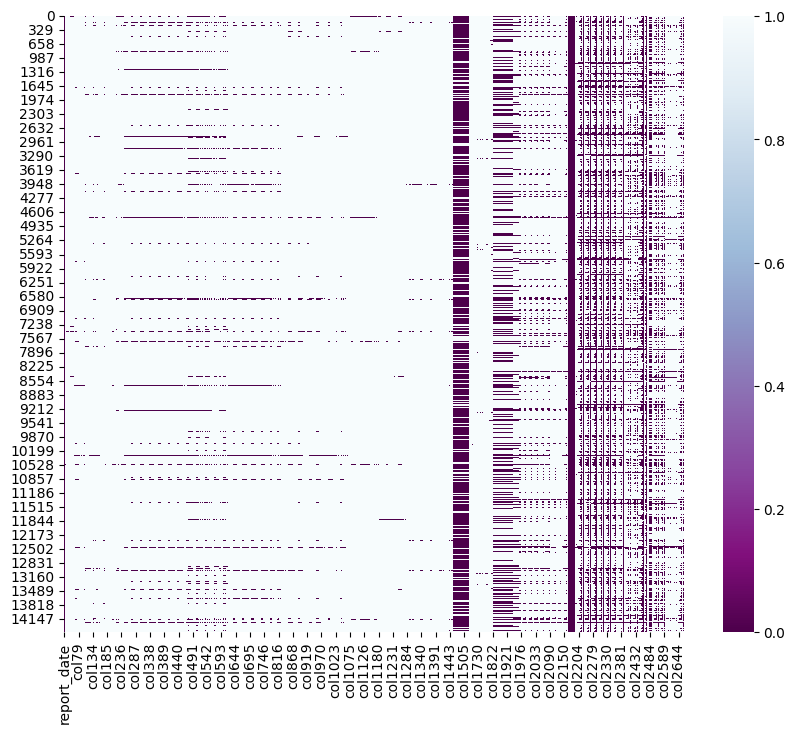

In [128]:
# визуализируем пропуски
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='BuPu_r')

всё очень-очень плохо

In [129]:
# удаляем колонки, в которых только NaN
df = df.dropna(how = 'all', axis = 1)

In [130]:
# смотрим сколько колонок осталось
df.shape

(14456, 2212)

минус одна колонка

In [131]:
# смотрим кол-во пропусков в подписанных колонках
print(f'''Количество пропусков в колонках:
"target" - {df['target'].isnull().sum()}
"report_date" - {df['report_date'].isnull().sum()}
"client_id" - {df['client_id'].isnull().sum()}''')

Количество пропусков в колонках:
"target" - 0
"report_date" - 0
"client_id" - 0


Пропусков в этих колонках нет, -> так же отсутствуют полностью пустые строчки

In [132]:
# ищем ещё колонки, в которых нет пропусков
df.columns[df.notna().all()]

Index(['report_date', 'client_id', 'target', 'col1453', 'col2663'], dtype='object')

Помимо подписанных колонок, пропусков так же нет в колонках "col1453" и "col2663".

Посмотрим, какие данные в них хранятся:

In [133]:
df['col1453'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14456 entries, 0 to 14455
Series name: col1453
Non-Null Count  Dtype
--------------  -----
14456 non-null  int64
dtypes: int64(1)
memory usage: 113.1 KB


In [134]:
df['col1453'].unique()

array([0, 1])

[0, 1] -> булевое значение

In [135]:
df['col2663'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14456 entries, 0 to 14455
Series name: col2663
Non-Null Count  Dtype  
--------------  -----  
14456 non-null  float64
dtypes: float64(1)
memory usage: 113.1 KB


In [136]:
df['col2663'].unique()

array([0.25626138, 0.25868176, 0.2541643 , ..., 0.26029922, 0.26185761,
       0.28014841], shape=(1026,))

In [137]:
df['col2663'].describe()

count    14456.000000
mean         0.258330
std          0.006802
min          0.230229
25%          0.256261
50%          0.256261
75%          0.257217
max          0.339800
Name: col2663, dtype: float64

какие-то чиселки, вероятность того что человек купит машиноместо

In [138]:
df = df.rename(columns={'col2663': 'probability'})

In [139]:
# удалим колонки, где кол-во пропусков превышает 95%
thresh = len(df)*0.95
df1 = df.loc[:, df.isna().sum().le(thresh)]

In [140]:
df1.head(10)

report_date  client_id  target               col228  col248    col252  \
0  2022-11-01          1       0                  NaN     NaN       NaN   
1  2022-11-01          5       0                  NaN     1.0  0.000000   
2  2022-05-01          6       0                  NaN     NaN       NaN   
3  2022-09-01          7       0                  NaN     NaN       NaN   
4  2022-08-01          8       0                  NaN     NaN       NaN   
5  2023-02-01         10       0                  NaN     NaN       NaN   
6  2022-11-01         16       0                  NaN     NaN       NaN   
7  2023-01-01         17       0                  NaN     NaN       NaN   
8  2023-01-01         18       0  https://samolet.ru/     1.0  0.166667   
9  2022-02-01         19       0                  NaN     NaN       NaN   

   col256    col260  col264    col268  ...     col2651     col2652  \
0     NaN       NaN     NaN       NaN  ...         NaN         NaN   
1     0.0  1.000000     0.0  1.000000  ...         NaN         NaN   
2     NaN       NaN     NaN       NaN  ...         NaN         NaN   
3     NaN       NaN     NaN       NaN  ...         NaN         NaN   
4     NaN       NaN     NaN       NaN  ...         NaN         NaN   
5     NaN       NaN     NaN       NaN  ...  10850000.0  10850000.0   
6     NaN       NaN     NaN       NaN  ...         NaN         NaN   
7     NaN       NaN     NaN       NaN  ...         NaN         NaN   
8     0.0  0.666667     0.0  0.333333  ...         NaN         NaN   
9     NaN       NaN     NaN       NaN  ...         NaN         NaN   

      col2653     col2654     col2655     col2656     col2660     col2661  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN   7616803.0   7616803.0   7616803.0   7616803.0   7616803.0   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   
5  10850000.0  10850000.0  10850000.0  10850000.0  10850000.0  10850000.0   
6         NaN         NaN         NaN         NaN         NaN         NaN   
7         NaN         NaN         NaN         NaN         NaN         NaN   
8         NaN         NaN         NaN         NaN         NaN         NaN   
9         NaN         NaN         NaN         NaN         NaN         NaN   

      col2662  probability  
0         NaN     0.256261  
1   7616803.0     0.256261  
2         NaN     0.256261  
3         NaN     0.258682  
4         NaN     0.254164  
5  10850000.0     0.318994  
6         NaN     0.258853  
7         NaN     0.256261  
8         NaN     0.266285  
9         NaN     0.256261  

[10 rows x 719 columns]

<Axes: >

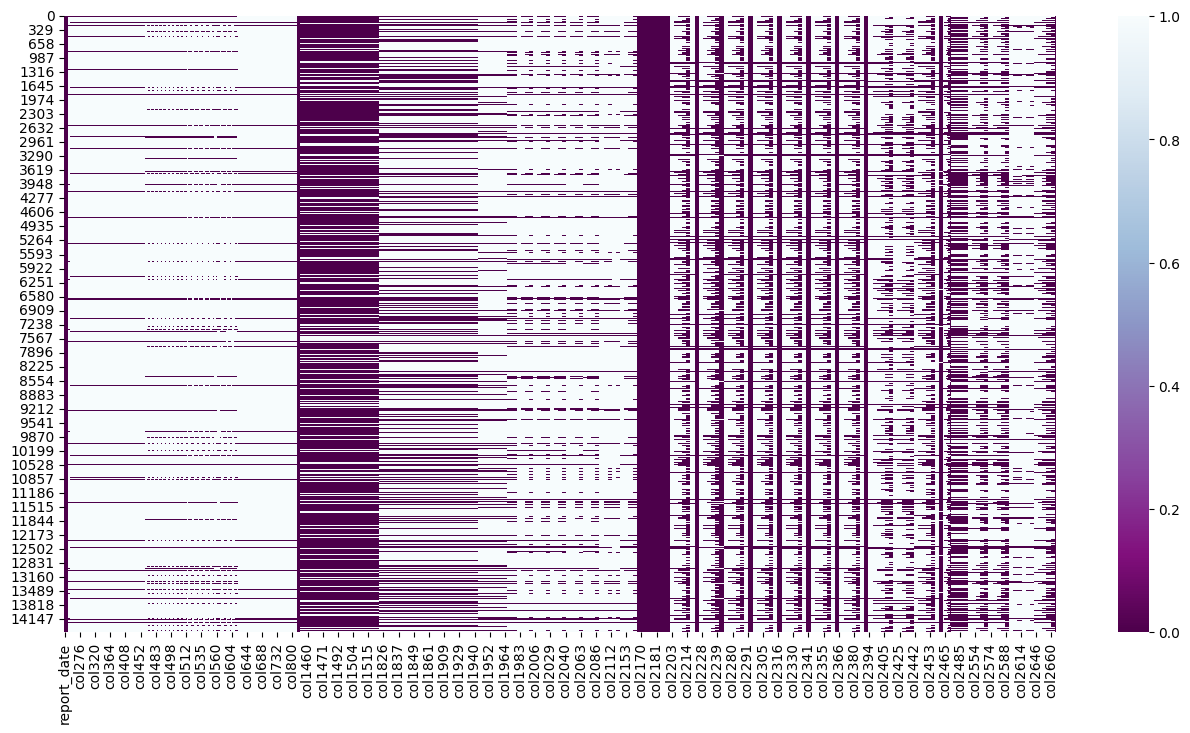

In [141]:
plt.figure(figsize = (16, 8))
sns.heatmap(df1.isnull(), cmap = 'BuPu_r')

In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 719 entries, report_date to probability
dtypes: float64(673), int64(3), object(43)
memory usage: 79.3+ MB


43 колонки с типом данных object осталось

## Работа с колонками с типом данных "object"
(кодирование\удаление\заполнение)

In [143]:
# смотрим на колонки с типом данных object
df1.select_dtypes(include=['object']).columns

Index(['report_date', 'col228', 'col464', 'col472', 'col516', 'col518',
       'col519', 'col520', 'col524', 'col526', 'col527', 'col528', 'col532',
       'col534', 'col535', 'col536', 'col540', 'col542', 'col543', 'col544',
       'col548', 'col550', 'col551', 'col552', 'col559', 'col560', 'col568',
       'col576', 'col588', 'col590', 'col591', 'col592', 'col596', 'col598',
       'col599', 'col600', 'col604', 'col606', 'col607', 'col608', 'col616',
       'col800', 'col1454'],
      dtype='object')

In [144]:
df1['col1454']

0        00f3d719-a6ec-4960-ba01-8372eb705443
1        01febac0-b083-494e-8589-f98400074b94
2        0278175e-c0bb-4e1e-bfe5-20db6811d3e2
3        0364571d-5325-ed11-b823-005056b825cd
4        065957a6-9b2a-435a-b561-024e9e8d9ad7
                         ...                 
14451    fc4b5aa0-c4d6-4394-93db-57a1505e66c4
14452    fcc827d8-b64b-4b59-b718-87f2a51d77a4
14453    fd5f22f5-36f6-4dca-9896-8c9e90bbb702
14454    fdf04fb7-5404-4a9c-ae5b-e1e893060631
14455    fe392549-9af9-4b12-921b-b391693b8b27
Name: col1454, Length: 14456, dtype: object

In [145]:
# смотрим на кол-во уникальных значений и кол-во пропусков
print(f'''Количество уникальных значений: {df1['col1454'].nunique()}
Количество пропусков: {df1['col1454'].isnull().sum()}''')

Количество уникальных значений: 4817
Количество пропусков: 1


в колонке "col1454" хранятся захэшированные данные, с ними ничего дельного не сделать -> удаляем колонку:

In [146]:
df1.drop(['col1454'], axis = 1, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3895219348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col1454'], axis = 1, inplace = True)


In [147]:
object_col = ['report_date', 'col228', 'col464', 'col472', 'col516', 'col518',
       'col519', 'col520', 'col524', 'col526', 'col527', 'col528', 'col532',
       'col534', 'col535', 'col536', 'col540', 'col542', 'col543', 'col544',
       'col548', 'col550', 'col551', 'col552', 'col559', 'col560', 'col568',
       'col576', 'col588', 'col590', 'col591', 'col592', 'col596', 'col598',
       'col599', 'col600', 'col604', 'col606', 'col607', 'col608', 'col616',
       'col800']

for col in object_col:
    print(f'{col}: {df1[col].unique()}')

report_date: ['2022-11-01' '2022-05-01' '2022-09-01' '2022-08-01' '2023-02-01'
 '2023-01-01' '2022-02-01' '2022-12-01' '2022-06-01' '2022-10-01'
 '2021-08-01' '2021-05-01' '2022-04-01' '2022-03-01' '2022-07-01'
 '2021-10-01' '2021-02-01' '2022-01-01' '2021-12-01' '2021-04-01'
 '2021-06-01' '2021-11-01' '2021-07-01' '2021-09-01' '2021-03-01']
col228: [nan 'https://samolet.ru/'
 'https://samolet.ru/spb/?utm_source=yandex_search&utm_medium=cpc&utm_campaign=samolet_live_yd_s_brand_rf_brand_spb_common_search_search_samolet_text_rf_33~n2jmmjvj|76037737&utm_term=%D0%B7%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B9%D1%89%D0%B8%D0%BA%20%D1%81%D0%B0%D0%BC%D0%BE%D0%BB%D0%B5%D1%82%20%D1%81%D0%BF%D0%B1&utm_content=39756956308_|cid|76037737|gid|4961640683|aid|12383135333|adp|no|pos|premium1|src|search_none|dvc|mobile|reg|146|text_otdelka&calltouch_tm=yd_c:76037737_gb:4961640683_ad:12383135333_ph:39756956308_st:search_pt:premium_p:1_s:none_dt:mobile_reg:146_ret:_apt:none&etext=2202.465i0WoRE91Vhg5hfO__-SXoAFTq

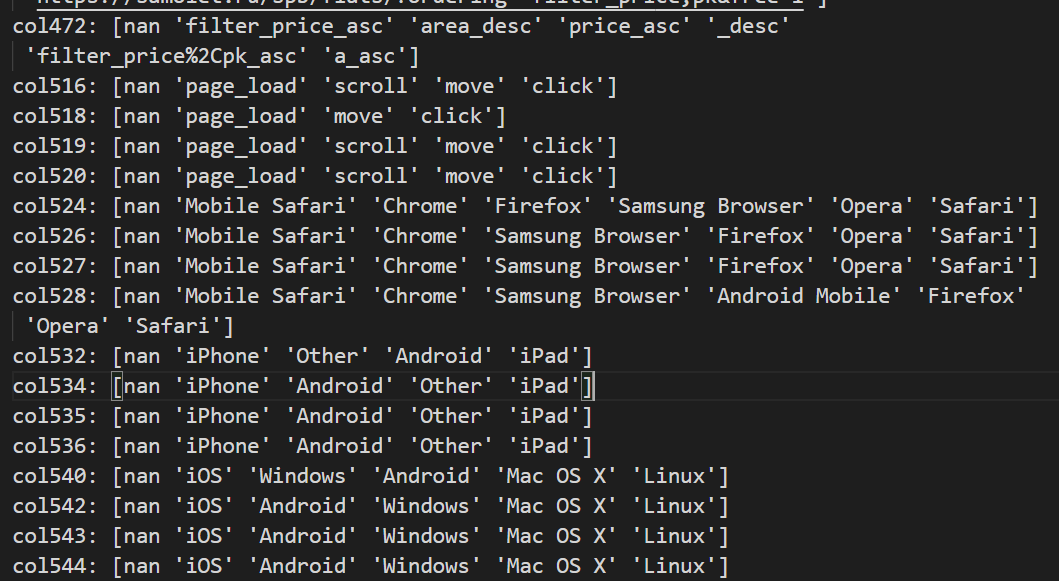

Есть колонки, которые содержат одинкаковые значения, но не были удалены. Выведем их

In [148]:
# с колонки col532 по колонку col536
df_34_36 = df.loc[:, 'col534':'col536']
df_34_36.head(40)

col534   col535   col536
0       NaN      NaN      NaN
1    iPhone   iPhone   iPhone
2       NaN      NaN      NaN
3       NaN      NaN      NaN
4       NaN      NaN      NaN
5       NaN      NaN      NaN
6       NaN      NaN      NaN
7       NaN      NaN      NaN
8   Android  Android  Android
9       NaN      NaN      NaN
10      NaN      NaN      NaN
11  Android  Android  Android
12      NaN      NaN      NaN
13      NaN      NaN      NaN
14      NaN      NaN      NaN
15      NaN      NaN      NaN
16      NaN      NaN      NaN
17      NaN      NaN      NaN
18      NaN      NaN      NaN
19      NaN      NaN   iPhone
20      NaN      NaN      NaN
21      NaN      NaN      NaN
22  Android  Android  Android
23  Android  Android  Android
24      NaN      NaN      NaN
25      NaN      NaN      NaN
26      NaN      NaN      NaN
27      NaN      NaN      NaN
28      NaN      NaN      NaN
29      NaN      NaN      NaN
30      NaN      NaN      NaN
31      NaN      NaN      NaN
32      NaN      NaN      NaN
33      NaN      NaN      NaN
34      NaN      NaN      NaN
35      NaN  Android  Android
36      NaN      NaN    Other
37      NaN      NaN      NaN
38      NaN      NaN      NaN
39    Other    Other    Other

проглядывается, что по строке значения в этих столбцах совпадают. можно объединить их в одну

In [149]:
dev = df1['col534'].combine_first(df1['col535']).combine_first(df1['col536'])
df1['device'] = dev
df1['device'].head(40)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\2240248175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['device'] = dev


0         NaN
1      iPhone
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8     Android
9         NaN
10        NaN
11    Android
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19     iPhone
20        NaN
21        NaN
22    Android
23    Android
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35    Android
36      Other
37        NaN
38        NaN
39      Other
Name: device, dtype: object

In [150]:
# удаляем изначальные колонки
df1.drop(columns=['col534', 'col535', 'col536'], axis = 1, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\2504228699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['col534', 'col535', 'col536'], axis = 1, inplace = True)


In [151]:
# закодируем данные к колонке:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df1['device'] = le.fit_transform(df1['device'])
int_dev = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "device": {int_dev}')

Новые значения по колонке "device": {'Android': 0, 'Other': 1, 'iPad': 2, 'iPhone': 3, nan: 4}


C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3487320227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['device'] = le.fit_transform(df1['device'])


In [152]:
df1['device']

0        4
1        3
2        4
3        4
4        4
        ..
14451    4
14452    4
14453    4
14454    4
14455    4
Name: device, Length: 14456, dtype: int64

In [153]:
# пропуски закодировались тоже... меняем 4-ки оььратно на NaN
df1['device'] = df1['device'].replace([4], np.nan) 
#df1['device'] = df1['device'].astype(int)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3817783139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['device'] = df1['device'].replace([4], np.nan)


In [154]:
df1['device']

0        NaN
1        3.0
2        NaN
3        NaN
4        NaN
        ... 
14451    NaN
14452    NaN
14453    NaN
14454    NaN
14455    NaN
Name: device, Length: 14456, dtype: float64

колонки col559 и col228 хранят ссылки, их можно удалить

In [155]:
df1.drop(['col228'], axis = 1, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\607412030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col228'], axis = 1, inplace = True)


In [156]:
df1.drop(['col559'], axis = 1, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\2780014963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col559'], axis = 1, inplace = True)


In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 714 entries, report_date to device
dtypes: float64(674), int64(3), object(37)
memory usage: 78.7+ MB


In [158]:
# кодируем колонку report_date
df1['report_date'] = le.fit_transform(df1['report_date'])
data_srez = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "report_date": {data_srez}')

Новые значения по колонке "report_date": {'2021-02-01': 0, '2021-03-01': 1, '2021-04-01': 2, '2021-05-01': 3, '2021-06-01': 4, '2021-07-01': 5, '2021-08-01': 6, '2021-09-01': 7, '2021-10-01': 8, '2021-11-01': 9, '2021-12-01': 10, '2022-01-01': 11, '2022-02-01': 12, '2022-03-01': 13, '2022-04-01': 14, '2022-05-01': 15, '2022-06-01': 16, '2022-07-01': 17, '2022-08-01': 18, '2022-09-01': 19, '2022-10-01': 20, '2022-11-01': 21, '2022-12-01': 22, '2023-01-01': 23, '2023-02-01': 24}


C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3554179256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['report_date'] = le.fit_transform(df1['report_date'])


In [159]:
# смотрим на колонку col464
df1['col464'].unique()

array([nan, 'https://samolet.ru/flats/?project=7',
       'https://samolet.ru/flats/?project=21',
       'https://samolet.ru/spb/flats/?free=1&ordering=filter_price,pk&project=25',
       'https://samolet.ru/spb/flats/',
       'https://samolet.ru/flats/?ordering=filter_price,pk&free=1&rooms=4&project=57',
       'https://samolet.ru/spb/flats/?ordering=filter_price,pk&free=1&project=25&rooms=1&settling_date=20243,20234&building=548',
       'https://samolet.ru/flats/?ordering=filter_price,pk&free=1&project=57',
       'https://samolet.ru/flats/?ordering=filter_price,pk&free=1&layout=7258',
       'https://samolet.ru/flats/?project=31&price_min=6800000&price_max=8020734&ordering=filter_price,pk&free=1&renovation=1&has_kitchen=1&rooms=0&settling_date=20241',
       'https://samolet.ru/flats/?free=1&ordering=filter_price,pk&rooms=1&area_min=30&area_max=56&floor_min=2&floor_max=10&project=7',
       'https://samolet.ru/spb/project/zhivi-v-rybackom/',
       'https://samolet.ru/spb/flats/?p

в колонке ссылки, удаляем колонку

In [160]:
df1.drop(['col464'], axis = 1, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\1957327669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col464'], axis = 1, inplace = True)


In [161]:
# смотрим на колонку col472
df1['col472'].unique()

array([nan, 'filter_price_asc', 'area_desc', 'price_asc', '_desc',
       'filter_price%2Cpk_asc', 'a_asc'], dtype=object)

In [162]:
# кодируем эту колонку
df1['col472'] = le.fit_transform(df1['col472'])
filt = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "col472": {filt}')

Новые значения по колонке "col472": {'_desc': 0, 'a_asc': 1, 'area_desc': 2, 'filter_price%2Cpk_asc': 3, 'filter_price_asc': 4, 'price_asc': 5, nan: 6}


C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3174038655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col472'] = le.fit_transform(df1['col472'])


In [163]:
df1['col472'] = df1['col472'].replace([6], np.nan)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\860608130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col472'] = df1['col472'].replace([6], np.nan)


In [164]:
# следующие колонки
print(df1['col516'].unique(),
df1['col518'].unique(),
df1['col519'].unique(),
df1['col520'].unique(), sep = '\n')

[nan 'page_load' 'scroll' 'move' 'click']
[nan 'page_load' 'move' 'click']
[nan 'page_load' 'scroll' 'move' 'click']
[nan 'page_load' 'scroll' 'move' 'click']


In [165]:
columns = ['col516', 'col518', 'col519', 'col520']
df1[columns].head(40)

col516     col518     col519     col520
0         NaN        NaN        NaN        NaN
1   page_load  page_load  page_load  page_load
2         NaN        NaN        NaN        NaN
3         NaN        NaN        NaN        NaN
4         NaN        NaN        NaN        NaN
5         NaN        NaN        NaN        NaN
6         NaN        NaN        NaN        NaN
7         NaN        NaN        NaN        NaN
8   page_load  page_load  page_load  page_load
9         NaN        NaN        NaN        NaN
10        NaN        NaN        NaN        NaN
11        NaN  page_load  page_load  page_load
12        NaN        NaN        NaN        NaN
13        NaN        NaN        NaN        NaN
14        NaN        NaN        NaN        NaN
15        NaN        NaN        NaN        NaN
16        NaN        NaN        NaN        NaN
17        NaN        NaN        NaN        NaN
18        NaN        NaN        NaN        NaN
19  page_load        NaN        NaN  page_load
20        NaN        NaN        NaN        NaN
21        NaN        NaN        NaN        NaN
22        NaN  page_load  page_load  page_load
23        NaN  page_load  page_load  page_load
24        NaN        NaN        NaN        NaN
25        NaN        NaN        NaN        NaN
26        NaN        NaN        NaN        NaN
27        NaN        NaN        NaN        NaN
28        NaN        NaN        NaN        NaN
29        NaN        NaN        NaN        NaN
30        NaN        NaN        NaN        NaN
31        NaN        NaN        NaN        NaN
32        NaN        NaN        NaN        NaN
33        NaN        NaN        NaN        NaN
34        NaN        NaN        NaN        NaN
35  page_load        NaN  page_load  page_load
36        NaN        NaN        NaN  page_load
37        NaN        NaN        NaN        NaN
38        NaN        NaN        NaN        NaN
39  page_load  page_load  page_load  page_load

In [166]:
# кодируем, чтобы в каждой колонке одно и то же значение имели одиноковое число

columns = ['col516', 'col518', 'col519', 'col520']


# хранение соответствий между исходными значениями и закодированными
encoding_map = {}
current_code = 1 

for column in columns:
    for idx, value in enumerate(df1[column]):
        # не кодируем пропуски (NaN)
        if pd.isna(value):
            continue
        if value not in encoding_map:
            encoding_map[value] = current_code
            current_code += 1
        df1.at[idx, column] = encoding_map[value]

df1[columns].head(40)

col516 col518 col519 col520
0     NaN    NaN    NaN    NaN
1       1      1      1      1
2     NaN    NaN    NaN    NaN
3     NaN    NaN    NaN    NaN
4     NaN    NaN    NaN    NaN
5     NaN    NaN    NaN    NaN
6     NaN    NaN    NaN    NaN
7     NaN    NaN    NaN    NaN
8       1      1      1      1
9     NaN    NaN    NaN    NaN
10    NaN    NaN    NaN    NaN
11    NaN      1      1      1
12    NaN    NaN    NaN    NaN
13    NaN    NaN    NaN    NaN
14    NaN    NaN    NaN    NaN
15    NaN    NaN    NaN    NaN
16    NaN    NaN    NaN    NaN
17    NaN    NaN    NaN    NaN
18    NaN    NaN    NaN    NaN
19      1    NaN    NaN      1
20    NaN    NaN    NaN    NaN
21    NaN    NaN    NaN    NaN
22    NaN      1      1      1
23    NaN      1      1      1
24    NaN    NaN    NaN    NaN
25    NaN    NaN    NaN    NaN
26    NaN    NaN    NaN    NaN
27    NaN    NaN    NaN    NaN
28    NaN    NaN    NaN    NaN
29    NaN    NaN    NaN    NaN
30    NaN    NaN    NaN    NaN
31    NaN    NaN    NaN    NaN
32    NaN    NaN    NaN    NaN
33    NaN    NaN    NaN    NaN
34    NaN    NaN    NaN    NaN
35      1    NaN      1      1
36    NaN    NaN    NaN      1
37    NaN    NaN    NaN    NaN
38    NaN    NaN    NaN    NaN
39      1      1      1      1

In [167]:
print(encoding_map)

{'page_load': 1, 'scroll': 2, 'move': 3, 'click': 4}


In [168]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 713 entries, report_date to device
dtypes: float64(675), int64(4), object(34)
memory usage: 78.6+ MB


In [169]:
df1['col516'] = df1['col516'].astype(float)
df1['col518'] = df1['col518'].astype(float)
df1['col519'] = df1['col519'].astype(float)
df1['col520'] = df1['col520'].astype(float)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3459417583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col516'] = df1['col516'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3459417583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col518'] = df1['col518'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3459417583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 713 entries, report_date to device
dtypes: float64(679), int64(4), object(30)
memory usage: 78.6+ MB


Таким же образом кодируем колонки col524, col526, col527, col528

In [171]:
columns_br = ['col524', 'col526', 'col527', 'col528']


# хранение соответствий между исходными значениями и закодированными
encoding_br = {}
current_code = 1 

for column in columns_br:
    for idx, value in enumerate(df1[column]):
        # не кодируем пропуски (NaN)
        if pd.isna(value):
            continue
        if value not in encoding_br:
            encoding_br[value] = current_code
            current_code += 1
        df1.at[idx, column] = encoding_br[value]

df1[columns_br].head(40)

col524 col526 col527 col528
0     NaN    NaN    NaN    NaN
1       1      1      1      1
2     NaN    NaN    NaN    NaN
3     NaN    NaN    NaN    NaN
4     NaN    NaN    NaN    NaN
5     NaN    NaN    NaN    NaN
6     NaN    NaN    NaN    NaN
7     NaN    NaN    NaN    NaN
8       2      2      2      2
9     NaN    NaN    NaN    NaN
10    NaN    NaN    NaN    NaN
11    NaN      2      2      2
12    NaN    NaN    NaN    NaN
13    NaN    NaN    NaN    NaN
14    NaN    NaN    NaN    NaN
15    NaN    NaN    NaN    NaN
16    NaN    NaN    NaN    NaN
17    NaN    NaN    NaN    NaN
18    NaN    NaN    NaN    NaN
19      1    NaN    NaN      1
20    NaN    NaN    NaN    NaN
21    NaN    NaN    NaN    NaN
22    NaN      2      2      2
23    NaN      2      2      2
24    NaN    NaN    NaN    NaN
25    NaN    NaN    NaN    NaN
26    NaN    NaN    NaN    NaN
27    NaN    NaN    NaN    NaN
28    NaN    NaN    NaN    NaN
29    NaN    NaN    NaN    NaN
30    NaN    NaN    NaN    NaN
31    NaN    NaN    NaN    NaN
32    NaN    NaN    NaN    NaN
33    NaN    NaN    NaN    NaN
34    NaN    NaN    NaN    NaN
35      2    NaN      2      2
36      2    NaN    NaN      2
37    NaN    NaN    NaN    NaN
38    NaN    NaN    NaN    NaN
39      2      2      2      2

In [172]:
print(encoding_br)

{'Mobile Safari': 1, 'Chrome': 2, 'Firefox': 3, 'Samsung Browser': 4, 'Opera': 5, 'Safari': 6, 'Android Mobile': 7}


In [173]:
df1['col524'] = df1['col524'].astype(float)
df1['col526'] = df1['col526'].astype(float)
df1['col527'] = df1['col526'].astype(float)
df1['col528'] = df1['col528'].astype(float)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\312743321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col524'] = df1['col524'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\312743321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col526'] = df1['col526'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\312743321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Кодируем колонки с ОС

In [174]:
columns_os = ['col540', 'col542', 'col543', 'col544']


# хранение соответствий между исходными значениями и закодированными
encoding_os = {}
current_code = 1 

for column in columns_os:
    for idx, value in enumerate(df1[column]):
        # не кодируем пропуски (NaN)
        if pd.isna(value):
            continue
        if value not in encoding_os:
            encoding_os[value] = current_code
            current_code += 1
        df1.at[idx, column] = encoding_os[value]

df1[columns_os].head(40)

col540 col542 col543 col544
0     NaN    NaN    NaN    NaN
1       1      1      1      1
2     NaN    NaN    NaN    NaN
3     NaN    NaN    NaN    NaN
4     NaN    NaN    NaN    NaN
5     NaN    NaN    NaN    NaN
6     NaN    NaN    NaN    NaN
7     NaN    NaN    NaN    NaN
8       2      3      3      3
9     NaN    NaN    NaN    NaN
10    NaN    NaN    NaN    NaN
11    NaN      3      3      3
12    NaN    NaN    NaN    NaN
13    NaN    NaN    NaN    NaN
14    NaN    NaN    NaN    NaN
15    NaN    NaN    NaN    NaN
16    NaN    NaN    NaN    NaN
17    NaN    NaN    NaN    NaN
18    NaN    NaN    NaN    NaN
19      1    NaN    NaN      1
20    NaN    NaN    NaN    NaN
21    NaN    NaN    NaN    NaN
22    NaN      3      3      3
23    NaN      3      3      3
24    NaN    NaN    NaN    NaN
25    NaN    NaN    NaN    NaN
26    NaN    NaN    NaN    NaN
27    NaN    NaN    NaN    NaN
28    NaN    NaN    NaN    NaN
29    NaN    NaN    NaN    NaN
30    NaN    NaN    NaN    NaN
31    NaN    NaN    NaN    NaN
32    NaN    NaN    NaN    NaN
33    NaN    NaN    NaN    NaN
34    NaN    NaN    NaN    NaN
35      3    NaN      3      3
36      2    NaN    NaN      2
37    NaN    NaN    NaN    NaN
38    NaN    NaN    NaN    NaN
39      2      2      2      2

In [175]:
print(encoding_os)

{'iOS': 1, 'Windows': 2, 'Android': 3, 'Mac OS X': 4, 'Linux': 5}


In [176]:
df1['col540'] = df1['col540'].astype(float)
df1['col542'] = df1['col542'].astype(float)
df1['col543'] = df1['col543'].astype(float)
df1['col544'] = df1['col544'].astype(float)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3829376615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col540'] = df1['col540'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3829376615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col542'] = df1['col542'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3829376615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 713 entries, report_date to device
dtypes: float64(687), int64(4), object(22)
memory usage: 78.6+ MB


In [178]:
df1.select_dtypes(include=['object']).columns

Index(['col532', 'col548', 'col550', 'col551', 'col552', 'col560', 'col568',
       'col576', 'col588', 'col590', 'col591', 'col592', 'col596', 'col598',
       'col599', 'col600', 'col604', 'col606', 'col607', 'col608', 'col616',
       'col800'],
      dtype='object')

In [179]:
object_col1 = ['col532', 'col548', 'col550', 'col551', 'col552', 'col560', 'col568',
       'col576', 'col588', 'col590', 'col591', 'col592', 'col596', 'col598',
       'col599', 'col600', 'col604', 'col606', 'col607', 'col608', 'col616',
       'col800']

for col in object_col1:
    print(f'{col}: {df1[col].unique()}\n\n')

col532: [nan 'iPhone' 'Other' 'Android' 'iPad']


col548: [nan '/project/sputnik/' '/' '/spb/project/astrid/'
 '/purchase/installment/' '/project/verejskaya-41/'
 '/news/unikalnaya-rassrochka-na-vse-kladovye-pomesheniya/' '/account/'
 '/account/flats/119817' '/account/login/' '/project/pyatnitskie-luga/'
 '/flats/' '/promo/samolet-bonus/' '/spb/flats/'
 '/purchase/employee-discount/' '/account/contracts/'
 '/project/sputnik/flats/117189/' '/spb/project/zhivi-v-rybackom/'
 '/spb/project/malaya-ohta/flats/77263/' '/storage/'
 '/news/rekomendujte-samolet-i-zarabotajte-100-000-rublej/' '/spb/'
 '/project/' '/spb/project/sunday/' '/project/verejskaya-41/flats/162269/'
 '/spb/parking/' '/news/' '/spb/account/login/' '/ipoteka-001/'
 '/contacts/novodanilovskaya-8' '/spb/it-mortgage/'
 '/project/zarechye-park/' '/account/payment/success/'
 '/account/flats/97044' '/project/troparevo-park/' '/spb/storage/'
 '/project/sputnik/flats/116774/'
 '/spb/project/zhivi-v-rybackom/flats/113612/'
 '/spb/pr

In [180]:
# хранение соответствий между исходными значениями и закодированными
encoding_q = {'Android': 0, 'Other': 1, 'iPad': 2, 'iPhone': 3}
current_code = 1 

for idx, value in enumerate(df1['col532']):
    # не кодируем пропуски (NaN)
    if pd.isna(value):
        continue
    if value not in encoding_q:
         encoding_q[value] = current_code
         current_code += 1
    df1.at[idx, 'col532'] = encoding_q[value]

df1['col532'].head(40)


0     NaN
1       3
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8       1
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19      3
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35      0
36      1
37    NaN
38    NaN
39      1
Name: col532, dtype: object

In [181]:
df1['col532'] = df1['col532'].astype(float)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\167921929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col532'] = df1['col532'].astype(float)


Кодируем колонки со странами 

In [182]:
columns_country = ['col588', 'col590', 'col591', 'col592']
df1[columns_country].head(40)

col588  col590  col591  col592
0      NaN     NaN     NaN     NaN
1   Russia  Russia  Russia  Russia
2      NaN     NaN     NaN     NaN
3      NaN     NaN     NaN     NaN
4      NaN     NaN     NaN     NaN
5      NaN     NaN     NaN     NaN
6      NaN     NaN     NaN     NaN
7      NaN     NaN     NaN     NaN
8   Russia  Russia  Russia  Russia
9      NaN     NaN     NaN     NaN
10     NaN     NaN     NaN     NaN
11     NaN  Russia  Russia  Russia
12     NaN     NaN     NaN     NaN
13     NaN     NaN     NaN     NaN
14     NaN     NaN     NaN     NaN
15     NaN     NaN     NaN     NaN
16     NaN     NaN     NaN     NaN
17     NaN     NaN     NaN     NaN
18     NaN     NaN     NaN     NaN
19  Russia     NaN     NaN  Russia
20     NaN     NaN     NaN     NaN
21     NaN     NaN     NaN     NaN
22     NaN  Russia  Russia  Russia
23     NaN  Russia  Russia  Russia
24     NaN     NaN     NaN     NaN
25     NaN     NaN     NaN     NaN
26     NaN     NaN     NaN     NaN
27     NaN     NaN     NaN     NaN
28     NaN     NaN     NaN     NaN
29     NaN     NaN     NaN     NaN
30     NaN     NaN     NaN     NaN
31     NaN     NaN     NaN     NaN
32     NaN     NaN     NaN     NaN
33     NaN     NaN     NaN     NaN
34     NaN     NaN     NaN     NaN
35  Russia     NaN  Russia  Russia
36  Russia     NaN     NaN  Russia
37     NaN     NaN     NaN     NaN
38     NaN     NaN     NaN     NaN
39  Russia  Russia  Russia  Russia

In [183]:
# хранение соответствий между исходными значениями и закодированными
encoding_country = {}
current_code = 1 

for column in columns_country:
    for idx, value in enumerate(df1[column]):
        # не кодируем пропуски (NaN)
        if pd.isna(value):
            continue
        if value not in encoding_country:
            encoding_country[value] = current_code
            current_code += 1
        df1.at[idx, column] = encoding_country[value]

df1[columns_country].head(40)

col588 col590 col591 col592
0     NaN    NaN    NaN    NaN
1       1      1      1      1
2     NaN    NaN    NaN    NaN
3     NaN    NaN    NaN    NaN
4     NaN    NaN    NaN    NaN
5     NaN    NaN    NaN    NaN
6     NaN    NaN    NaN    NaN
7     NaN    NaN    NaN    NaN
8       1      1      1      1
9     NaN    NaN    NaN    NaN
10    NaN    NaN    NaN    NaN
11    NaN      1      1      1
12    NaN    NaN    NaN    NaN
13    NaN    NaN    NaN    NaN
14    NaN    NaN    NaN    NaN
15    NaN    NaN    NaN    NaN
16    NaN    NaN    NaN    NaN
17    NaN    NaN    NaN    NaN
18    NaN    NaN    NaN    NaN
19      1    NaN    NaN      1
20    NaN    NaN    NaN    NaN
21    NaN    NaN    NaN    NaN
22    NaN      1      1      1
23    NaN      1      1      1
24    NaN    NaN    NaN    NaN
25    NaN    NaN    NaN    NaN
26    NaN    NaN    NaN    NaN
27    NaN    NaN    NaN    NaN
28    NaN    NaN    NaN    NaN
29    NaN    NaN    NaN    NaN
30    NaN    NaN    NaN    NaN
31    NaN    NaN    NaN    NaN
32    NaN    NaN    NaN    NaN
33    NaN    NaN    NaN    NaN
34    NaN    NaN    NaN    NaN
35      1    NaN      1      1
36      1    NaN    NaN      1
37    NaN    NaN    NaN    NaN
38    NaN    NaN    NaN    NaN
39      1      1      1      1

In [184]:
print(encoding_country)

{'Russia': 1, 'Kazakhstan': 2, 'Netherlands': 3, 'United States': 4, 'Montenegro': 5, 'Lebanon': 6, 'Sweden': 7, 'Germany': 8, 'Estonia': 9, 'Turkey': 10, 'Thailand': 11, 'Spain': 12, 'France': 13, 'Belgium': 14, 'Antigua and Barbuda': 15, 'Japan': 16, 'Finland': 17, 'Belarus': 18, 'Hungary': 19, 'Saudi Arabia': 20, 'United Kingdom': 21, 'Cyprus': 22, 'United Arab Emirates': 23, 'Poland': 24, 'Armenia': 25, 'Ukraine': 26}


In [185]:
df1[columns_country] = df1[columns_country].astype(float)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\3702238450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[columns_country] = df1[columns_country].astype(float)


In [186]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 713 entries, report_date to device
dtypes: float64(692), int64(4), object(17)
memory usage: 78.6+ MB


In [187]:
df1['col560'].unique()

array([nan, 'https://samolet.ru/',
       'https://samolet.ru/spb/flats/?free=1&ordering=filter_price,pk&project=25&rooms=0&area_min=24&area_max=27.44',
       'https://yandex.ru/', 'https://3ds-ds1.mirconnect.ru/',
       'https://samolet.ru/account/login/?next=/account/flats/165351',
       'https://www.google.com/', 'https://click.mail.ru/',
       'https://samolet.ru/account/login/?next=/account/flats/119817',
       'https://samolet.ru/account/login/?next=/account/flats/152201',
       'https://samolet.ru/project/novoe-vnukovo/?ysclid=la6us4gr1w556242526',
       'https://samolet.ru/account/login/?next=/account/favorites',
       'https://samolet.ru/account/deal/79c327be-ce7b-ed11-b823-005056b8a6c4/',
       'https://samolet.ru/spb/project/zhivi-v-rybackom/',
       'https://netmonet.co/',
       'https://samolet.ru/flats/?project=7&price_min=5574038&price_max=10873459&ordering=filter_price,pk&free=1&settling_date=20244&area_min=33&area_max=49.19',
       'https://duckduckgo.com/'

В колонке col560 ссылки, цдаляем колонку

In [188]:
df1.drop(['col560'], axis = 1, inplace=True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\1682056284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col560'], axis = 1, inplace=True)


In [189]:
df1['col800'].unique()

array([nan, '9c3b7e8f-941c-e811-80dd-005056b8d207',
       '6da279e4-2805-ea11-80ed-005056b8d207',
       'fab35ba8-af78-ec11-8121-005056b8d207',
       '3f7995b6-cb53-eb11-810b-005056b8d207',
       'a2d8abff-78b8-e611-80bf-005056b8d207',
       '983b7e8f-941c-e811-80dd-005056b8d207',
       'c151fc0d-9b43-e811-80de-005056b8d207',
       'dfad20e9-8c4b-e711-80c5-005056b8d207',
       'a43b7e8f-941c-e811-80dd-005056b8d207',
       'a03b7e8f-941c-e811-80dd-005056b8d207',
       '3b7995b6-cb53-eb11-810b-005056b8d207',
       'a23b7e8f-941c-e811-80dd-005056b8d207',
       '3d7995b6-cb53-eb11-810b-005056b8d207',
       '07091659-2705-e911-80e5-005056b8d207',
       'e48f6c85-7414-e711-80c1-005056b8d207',
       '92d863a3-1665-ea11-80f7-005056b8d207',
       '97a6d484-1665-ea11-80f7-005056b8d207',
       'deb76297-1665-ea11-80f7-005056b8d207',
       '3700ca2a-35dd-ea11-80fc-005056b8d207',
       'e34c4077-7127-e811-80dd-005056b8d207',
       '2c30ab69-847a-eb11-8110-005056b8d207',
       '

всякие закодированные (?) штуки, с них ничего не получить, -> удаляем

In [190]:
df1.drop(['col800'], axis = 1, inplace=True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_21368\194556554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col800'], axis = 1, inplace=True)


In [191]:
df['col568'].unique()

array([nan, 'sms', 'cpc', 'email', 'cpm', 'messenger', 'push', 'cpa',
       'fix', 'samolet', 'social-owned', 'special'], dtype=object)

Информация в колонке показывает, как пользователь попал на сайт

In [192]:
df1 = df1.rename(columns={'col568': 'going_to_the_site'})

In [193]:
# кодируем эту колонку
df1['going_to_the_site'] = le.fit_transform(df1['going_to_the_site'])
filt = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "going_to_the_site": {filt}')

Новые значения по колонке "going_to_the_site": {'cpa': 0, 'cpc': 1, 'cpm': 2, 'email': 3, 'fix': 4, 'messenger': 5, 'push': 6, 'samolet': 7, 'sms': 8, 'social-owned': 9, 'special': 10, nan: 11}


In [194]:
df1['going_to_the_site'] = df1['going_to_the_site'].replace([11], np.nan)

In [195]:
df1['going_to_the_site'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14456 entries, 0 to 14455
Series name: going_to_the_site
Non-Null Count  Dtype  
--------------  -----  
1034 non-null   float64
dtypes: float64(1)
memory usage: 113.1 KB


In [196]:
df1['col576'].unique()

array([nan, 'exponea', 'yandex_search', 'sms', 'yandex_network',
       'telegram_channels', 'google_search', 'trigger', 'yandex',
       'domclick_media', 'google_maps', 'google_network', 'cian_feed',
       'vk', 'ya_maps', 'mail_partners', 'instagram', 'S7'], dtype=object)

В колонке то, откуда человек перешёл на сайт (по рекламе???)

In [197]:
# кодируем эту колонку
df1['col576'] = le.fit_transform(df1['col576'])
filt = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "col576": {filt}')

Новые значения по колонке "col576": {'S7': 0, 'cian_feed': 1, 'domclick_media': 2, 'exponea': 3, 'google_maps': 4, 'google_network': 5, 'google_search': 6, 'instagram': 7, 'mail_partners': 8, 'sms': 9, 'telegram_channels': 10, 'trigger': 11, 'vk': 12, 'ya_maps': 13, 'yandex': 14, 'yandex_network': 15, 'yandex_search': 16, nan: 17}


In [198]:
df1['going_to_the_site'] = df1['going_to_the_site'].replace([17], np.nan)

Ещё колонки:

In [199]:
print(f'''{df1['col548'].unique()}

{df1['col550'].unique()}

{df1['col551'].unique()}

{df1['col552'].unique()}''')

[nan '/project/sputnik/' '/' '/spb/project/astrid/'
 '/purchase/installment/' '/project/verejskaya-41/'
 '/news/unikalnaya-rassrochka-na-vse-kladovye-pomesheniya/' '/account/'
 '/account/flats/119817' '/account/login/' '/project/pyatnitskie-luga/'
 '/flats/' '/promo/samolet-bonus/' '/spb/flats/'
 '/purchase/employee-discount/' '/account/contracts/'
 '/project/sputnik/flats/117189/' '/spb/project/zhivi-v-rybackom/'
 '/spb/project/malaya-ohta/flats/77263/' '/storage/'
 '/news/rekomendujte-samolet-i-zarabotajte-100-000-rublej/' '/spb/'
 '/project/' '/spb/project/sunday/' '/project/verejskaya-41/flats/162269/'
 '/spb/parking/' '/news/' '/spb/account/login/' '/ipoteka-001/'
 '/contacts/novodanilovskaya-8' '/spb/it-mortgage/'
 '/project/zarechye-park/' '/account/payment/success/'
 '/account/flats/97044' '/project/troparevo-park/' '/spb/storage/'
 '/project/sputnik/flats/116774/'
 '/spb/project/zhivi-v-rybackom/flats/113612/'
 '/spb/project/zhivi-v-rybackom/flats/113448/'
 '/project/sputnik/f

В этих колонках какие-то пути\ссылки, -> удаляем

In [200]:
df1.drop(['col548', 'col550', 'col551', 'col552'], axis = 1, inplace=True)

In [201]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 707 entries, report_date to device
dtypes: float64(693), int64(5), object(9)
memory usage: 78.0+ MB


In [202]:
df1.select_dtypes(include=['object']).columns

Index(['col596', 'col598', 'col599', 'col600', 'col604', 'col606', 'col607',
       'col608', 'col616'],
      dtype='object')

In [203]:
object_col2 = ['col596', 'col598', 'col599', 'col600', 'col604', 'col606', 'col607',
       'col608', 'col616']

for col in object_col2:
    print(f'{col}: {df1[col].unique()}\n\n')

col596: [nan 'Moscow' 'St.-Petersburg' 'Khanty-Mansia' 'Bashkortostan Republic'
 'Sakhalin Oblast' 'Volgograd Oblast' 'Almaty'
 'Primorskiy (Maritime) Kray' 'Novosibirsk Oblast' 'Yamalo-Nenets'
 'Chelyabinsk Oblast' 'Tatarstan Republic' 'South Holland'
 'Krasnodar Krai' 'Krasnodarskiy Kray' "Vladimirskaya Oblast'"
 'Leningrad Oblast' 'Kaliningrad Oblast' 'Voronezh Oblast' 'Kirov Oblast'
 'Irkutsk Oblast' 'Arkhangelskaya' 'Moscow Oblast' 'Transbaikal Territory'
 'Lipetsk Oblast' 'Krasnoyarsk Krai' 'California' 'Khabarovsk'
 'Yaroslavl Oblast' 'North Ossetia–Alania' 'Dagestan' 'Tomsk Oblast'
 'Vladimir Oblast' 'Rostov Oblast' 'Podgorica' 'Samara Oblast' 'Murmansk'
 'Nizhny Novgorod Oblast' 'Sakha' 'Omsk Oblast' 'Stockholm County'
 'Magadan Oblast' 'Perm Krai' 'Hesse' 'Krasnoyarskiy Kray' 'Tallinn'
 'Antalya' 'Orenburg Oblast' 'Nonthaburi' 'Komi' 'Kamchatka' 'Barcelona'
 'Amur Oblast' 'Stavropol Kray' 'West Flanders Province' 'Penza Oblast'
 'Kabardino-Balkariya Republic' 'Astrakhan Oblas

In [204]:
# кодируем колонку col616
df1['col616'] = le.fit_transform(df1['col616'])
filt = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "col616": {filt}')

Новые значения по колонке "col616": {'DuckDuckGo': 0, 'Gmail': 1, 'Google': 2, 'Mail.ru': 3, 'Vkontakte': 4, 'Yandex': 5, nan: 6}


In [205]:
df1['col616'] = df1['col616'].replace([6], np.nan)

In [206]:
town_colnm = ['col596', 'col598', 'col599', 'col600', 'col604', 'col606', 'col607',
       'col608']

encoding_tw = {}
current_code = 1 

for column in town_colnm:
    for idx, value in enumerate(df1[column]):
        # не кодируем пропуски (NaN)
        if pd.isna(value):
            continue
        if value not in encoding_tw:
            encoding_tw[value] = current_code
            current_code += 1
        df1.at[idx, column] = encoding_tw[value]

df1[town_colnm] = df1[town_colnm].astype(float)
df1[town_colnm].head(40)

col596  col598  col599  col600  col604  col606  col607  col608
0      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0
2      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
3      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
4      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
5      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
6      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
7      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
8      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0
9      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
11     NaN     2.0     2.0     2.0     NaN   114.0   114.0   114.0
12     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
13     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
14     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
15     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
16     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
17     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
18     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
19     1.0     NaN     NaN     1.0     1.0     NaN     NaN     1.0
20     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
21     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
22     NaN    19.0    19.0    19.0     NaN   131.0   131.0   131.0
23     NaN     2.0     2.0     2.0     NaN   114.0   114.0   114.0
24     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
25     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
26     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
27     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
28     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
29     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
30     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
31     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
32     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
33     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
34     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
35     2.0     NaN     2.0     2.0   114.0     NaN   114.0   114.0
36     3.0     NaN     NaN     3.0   115.0     NaN     NaN   115.0
37     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
38     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
39     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0

In [207]:
print(encoding_tw)

{'Moscow': 1, 'St.-Petersburg': 2, 'Khanty-Mansia': 3, 'Bashkortostan Republic': 4, 'Sakhalin Oblast': 5, 'Volgograd Oblast': 6, 'Almaty': 7, 'Primorskiy (Maritime) Kray': 8, 'Novosibirsk Oblast': 9, 'Yamalo-Nenets': 10, 'Chelyabinsk Oblast': 11, 'Tatarstan Republic': 12, 'South Holland': 13, 'Krasnodar Krai': 14, 'Krasnodarskiy Kray': 15, "Vladimirskaya Oblast'": 16, 'Leningrad Oblast': 17, 'Kaliningrad Oblast': 18, 'Voronezh Oblast': 19, 'Kirov Oblast': 20, 'Irkutsk Oblast': 21, 'Arkhangelskaya': 22, 'Moscow Oblast': 23, 'Transbaikal Territory': 24, 'Lipetsk Oblast': 25, 'Krasnoyarsk Krai': 26, 'California': 27, 'Khabarovsk': 28, 'Yaroslavl Oblast': 29, 'North Ossetia–Alania': 30, 'Dagestan': 31, 'Tomsk Oblast': 32, 'Vladimir Oblast': 33, 'Rostov Oblast': 34, 'Podgorica': 35, 'Samara Oblast': 36, 'Murmansk': 37, 'Nizhny Novgorod Oblast': 38, 'Sakha': 39, 'Omsk Oblast': 40, 'Stockholm County': 41, 'Magadan Oblast': 42, 'Perm Krai': 43, 'Hesse': 44, 'Krasnoyarskiy Kray': 45, 'Tallinn':

In [208]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 707 entries, report_date to device
dtypes: float64(702), int64(5)
memory usage: 78.0 MB


## Работа с полностью закодированными колонками.
Заполнение пропусков..

Матрица корреляции:

In [209]:
#plt.figure(figsize = (30,20))
#sns.heatmap(df1.corr(), cmap = 'flare', annot = True)
#plt.title('Матрица корреляции')

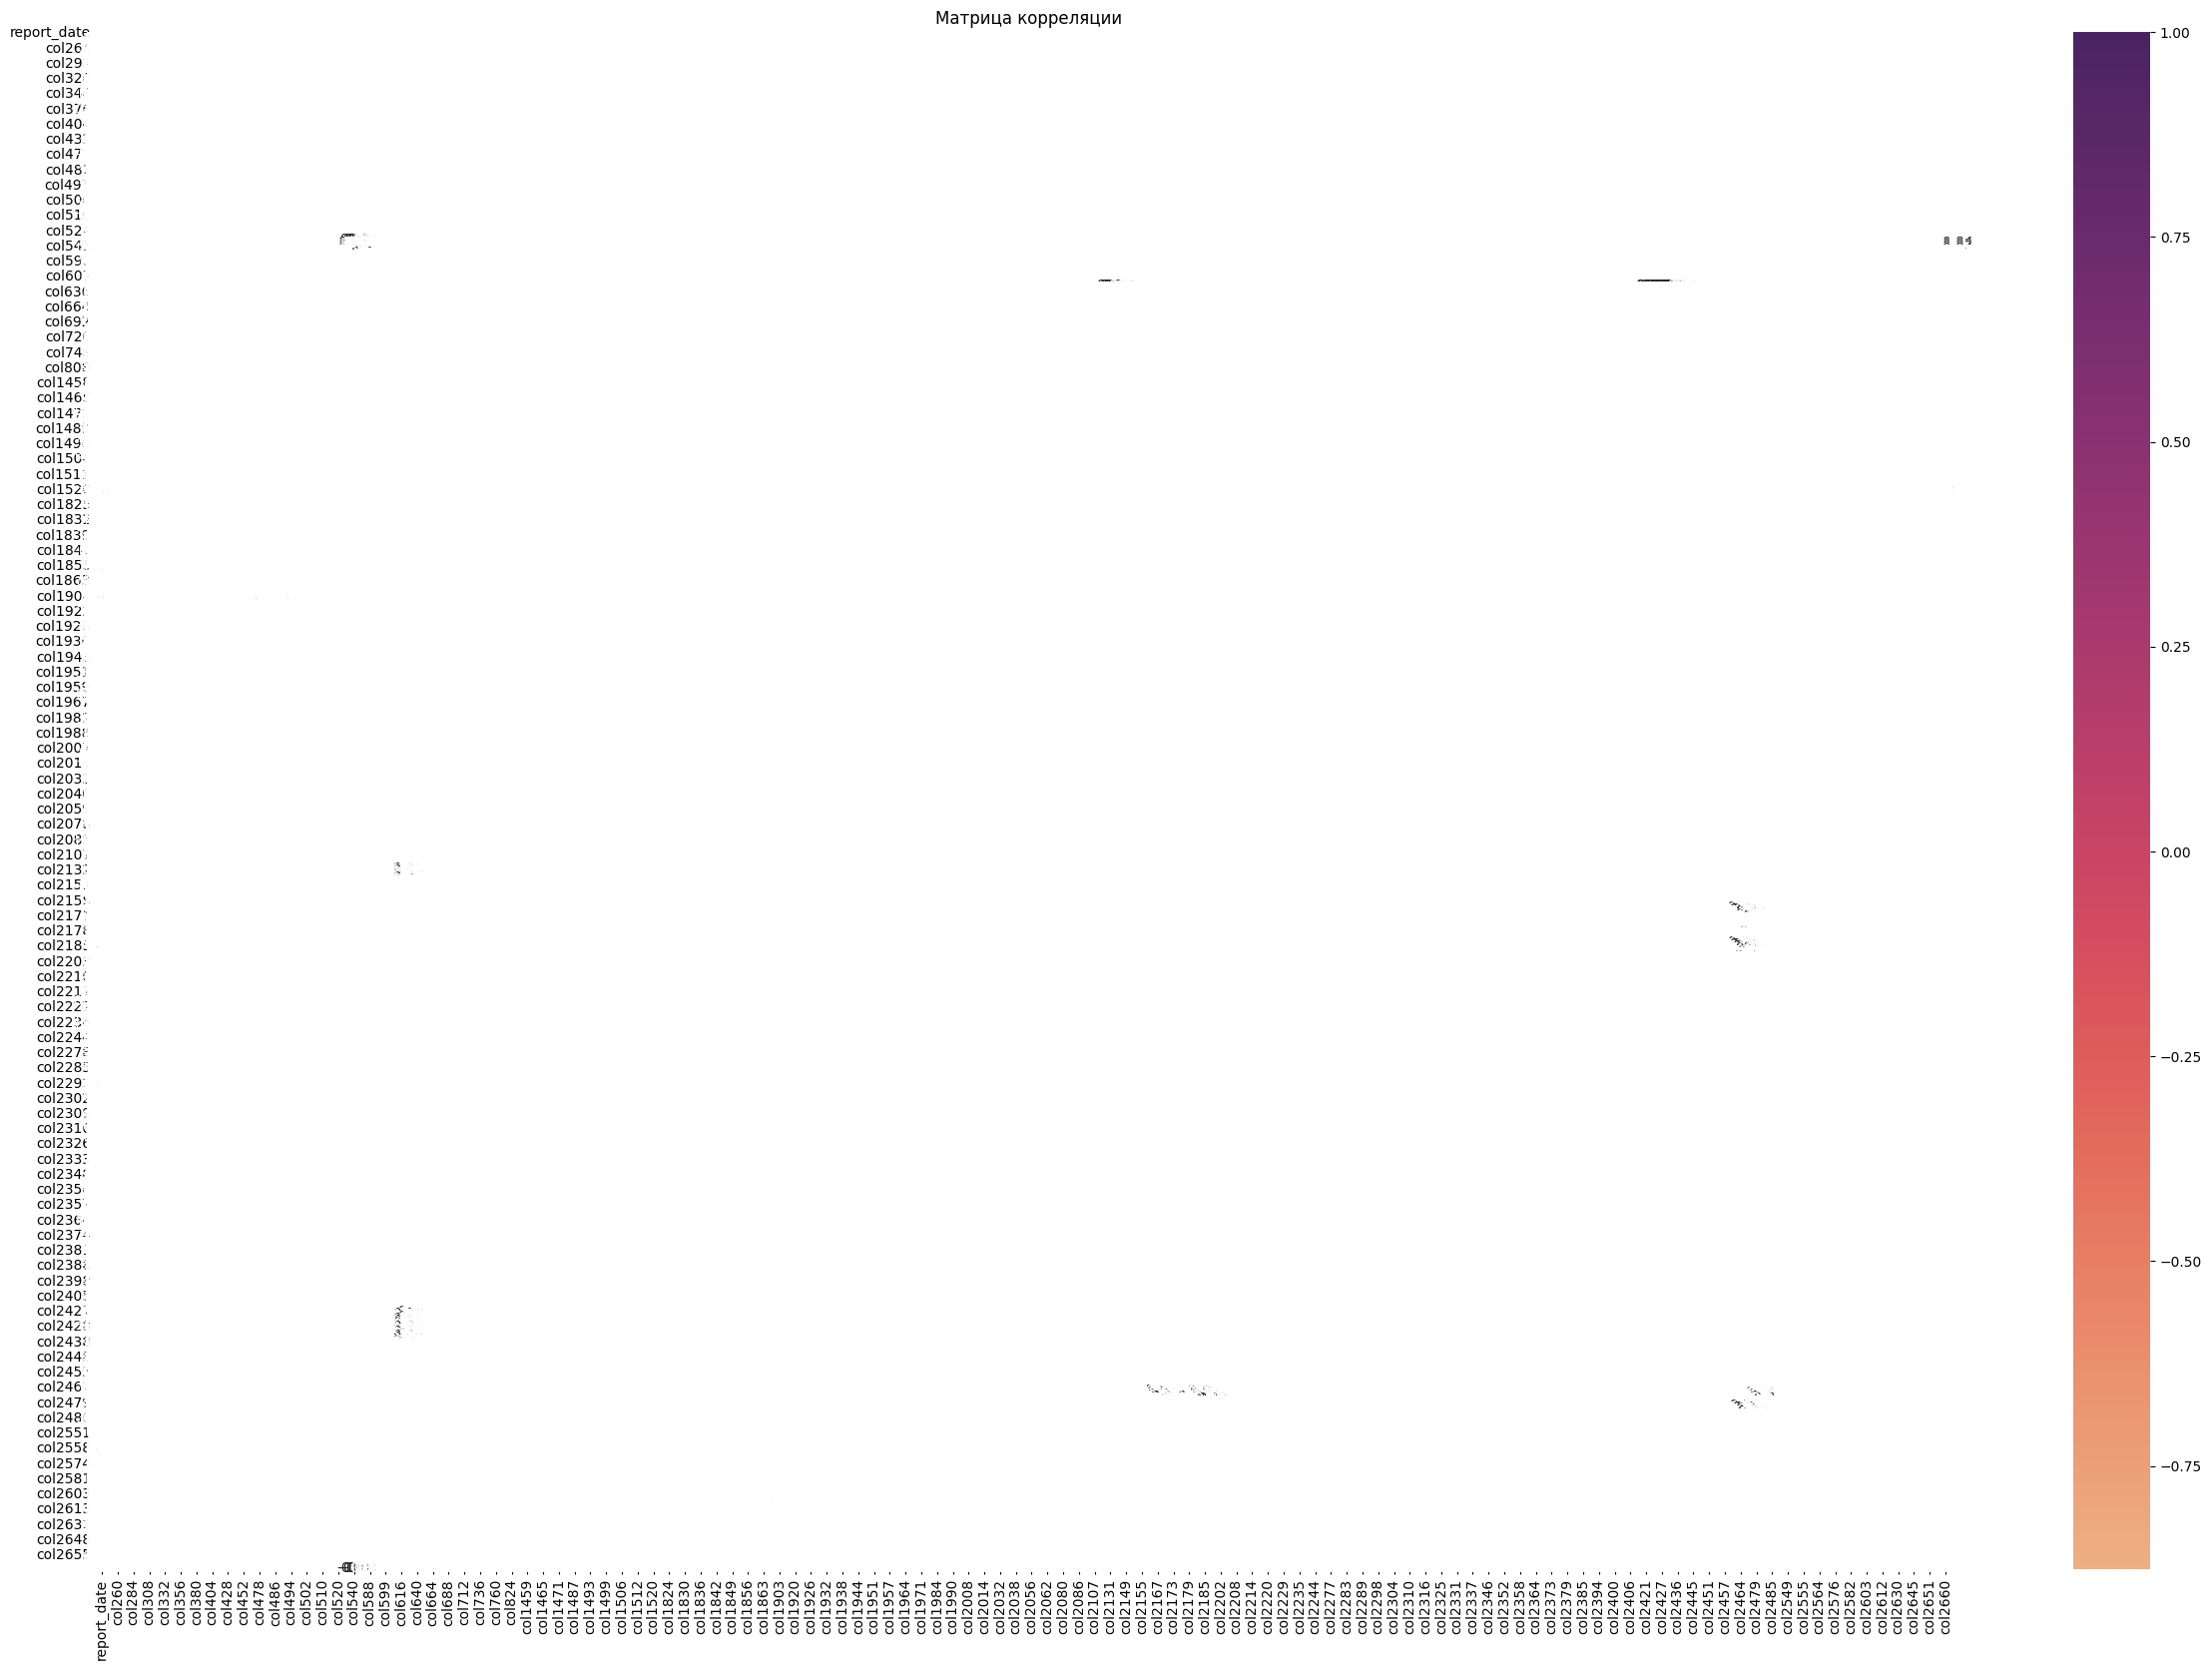

матрица странная, скорее всего из-за большого объёма данных :_(

ps: сама матрица почти 20 минут грузится, поэтому я закоментила ячейку и прикрепила фотку этой матрицы

In [210]:
df1.head(40)

report_date  client_id  target    col248    col252  col256    col260  \
0            21          1       0       NaN       NaN     NaN       NaN   
1            21          5       0  1.000000  0.000000     0.0  1.000000   
2            15          6       0       NaN       NaN     NaN       NaN   
3            19          7       0       NaN       NaN     NaN       NaN   
4            18          8       0       NaN       NaN     NaN       NaN   
5            24         10       0       NaN       NaN     NaN       NaN   
6            21         16       0       NaN       NaN     NaN       NaN   
7            23         17       0       NaN       NaN     NaN       NaN   
8            23         18       0  1.000000  0.166667     0.0  0.666667   
9            12         19       0       NaN       NaN     NaN       NaN   
10           12         21       0       NaN       NaN     NaN       NaN   
11           22         22       0  1.000000  0.202797     0.0  0.013986   
12           23         23       0       NaN       NaN     NaN       NaN   
13           22         24       0       NaN       NaN     NaN       NaN   
14           22         25       0       NaN       NaN     NaN       NaN   
15           21         26       0       NaN       NaN     NaN       NaN   
16           24         27       0       NaN       NaN     NaN       NaN   
17           19         28       0       NaN       NaN     NaN       NaN   
18           12         30       0       NaN       NaN     NaN       NaN   
19           22         31       0       NaN       NaN     NaN       NaN   
20           12         32       0       NaN       NaN     NaN       NaN   
21           16         32       0       NaN       NaN     NaN       NaN   
22           20         33       0       NaN       NaN     NaN       NaN   
23           22         34       0  0.333333  0.000000     0.0  0.333333   
24            6         35       0       NaN       NaN     NaN       NaN   
25            3         36       0       NaN       NaN     NaN       NaN   
26           15         37       0       NaN       NaN     NaN       NaN   
27           21         38       0       NaN       NaN     NaN       NaN   
28           20         39       0       NaN       NaN     NaN       NaN   
29           14         40       0       NaN       NaN     NaN       NaN   
30           24         42       0       NaN       NaN     NaN       NaN   
31           13         43       0       NaN       NaN     NaN       NaN   
32           17         44       0       NaN       NaN     NaN       NaN   
33           22         45       0       NaN       NaN     NaN       NaN   
34           14         46       0       NaN       NaN     NaN       NaN   
35           21         47       0  1.000000  0.000000     0.0  0.500000   
36           23         48       0       NaN       NaN     NaN       NaN   
37           24         49       0       NaN       NaN     NaN       NaN   
38           21         50       0       NaN       NaN     NaN       NaN   
39           18         51       1       NaN       NaN     NaN       NaN   

    col264    col268    col272  ...     col2652     col2653     col2654  \
0      NaN       NaN       NaN  ...         NaN         NaN         NaN   
1      0.0  1.000000  1.000000  ...         NaN         NaN   7616803.0   
2      NaN       NaN       NaN  ...         NaN         NaN         NaN   
3      NaN       NaN       NaN  ...         NaN         NaN         NaN   
4      NaN       NaN       NaN  ...         NaN         NaN         NaN   
5      NaN       NaN       NaN  ...  10850000.0  10850000.0  10850000.0   
6      NaN       NaN       NaN  ...         NaN         NaN         NaN   
7      NaN       NaN       NaN  ...         NaN         NaN         NaN   
8      0.0  0.333333  0.333333  ...         NaN         NaN         NaN   
9      NaN       NaN       NaN  ...         NaN         NaN         NaN   
10     NaN       NaN       NaN  ...         NaN         NaN   

<Axes: >

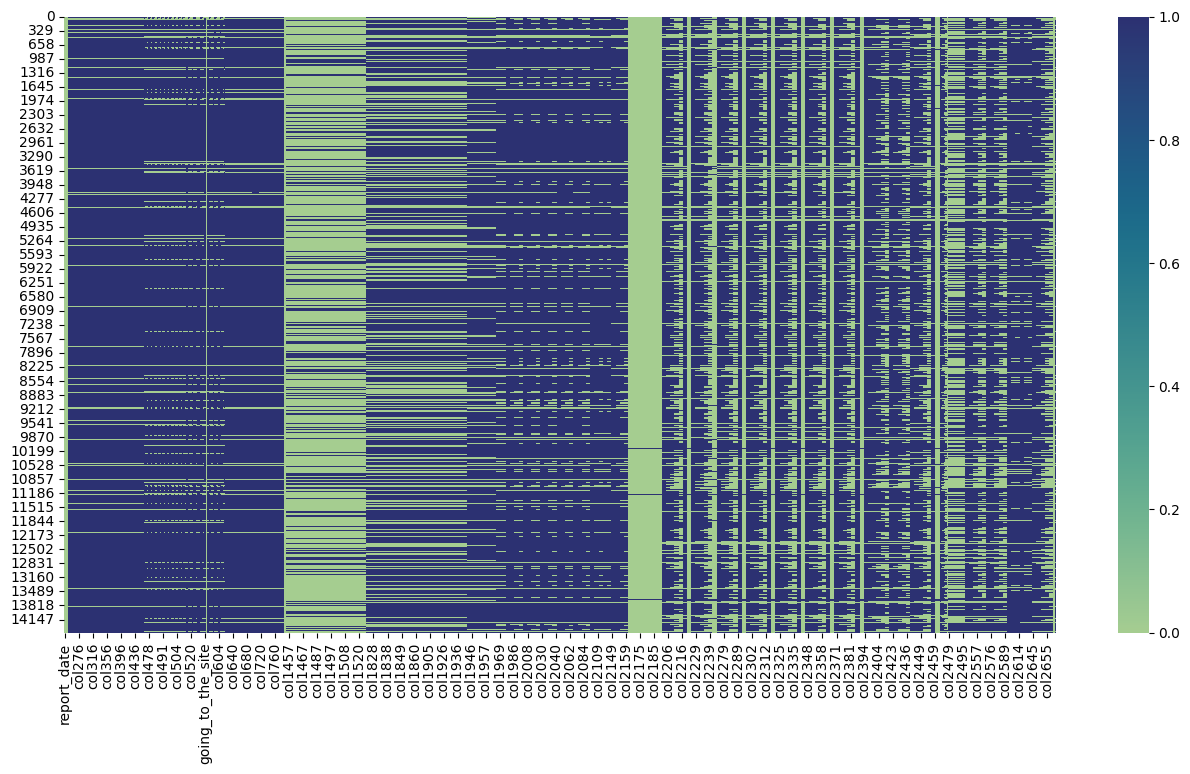

In [211]:
# смотрим на пропуски снооова
plt.figure(figsize = (16, 8))
sns.heatmap(df1.isnull(), cmap = 'crest')

In [212]:
# смотрим процент пропусков по колонкам
for column in df1.columns:
    print(f"Колонка: {column}")
    print(f"Количество пропусков: {df1[column].isna().mean() * 100} %")
    print("-" * 40)

Колонка: report_date
Количество пропусков: 0.0 %
----------------------------------------
Колонка: client_id
Количество пропусков: 0.0 %
----------------------------------------
Колонка: target
Количество пропусков: 0.0 %
----------------------------------------
Колонка: col248
Количество пропусков: 93.86413945766463 %
----------------------------------------
Колонка: col252
Количество пропусков: 93.86413945766463 %
----------------------------------------
Колонка: col256
Количество пропусков: 93.83646928610958 %
----------------------------------------
Колонка: col260
Количество пропусков: 93.86413945766463 %
----------------------------------------
Колонка: col264
Количество пропусков: 93.86413945766463 %
----------------------------------------
Колонка: col268
Количество пропусков: 93.86413945766463 %
----------------------------------------
Колонка: col272
Количество пропусков: 93.86413945766463 %
----------------------------------------
Колонка: col276
Количество пропусков: 93.864

In [213]:
# удалим колонки, где пропусков больше чем 85%
thresh = len(df1)*0.85
df2 = df1.loc[:, df1.isna().sum().le(thresh)]

In [214]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 377 entries, report_date to probability
dtypes: float64(372), int64(5)
memory usage: 41.6 MB


<Axes: >

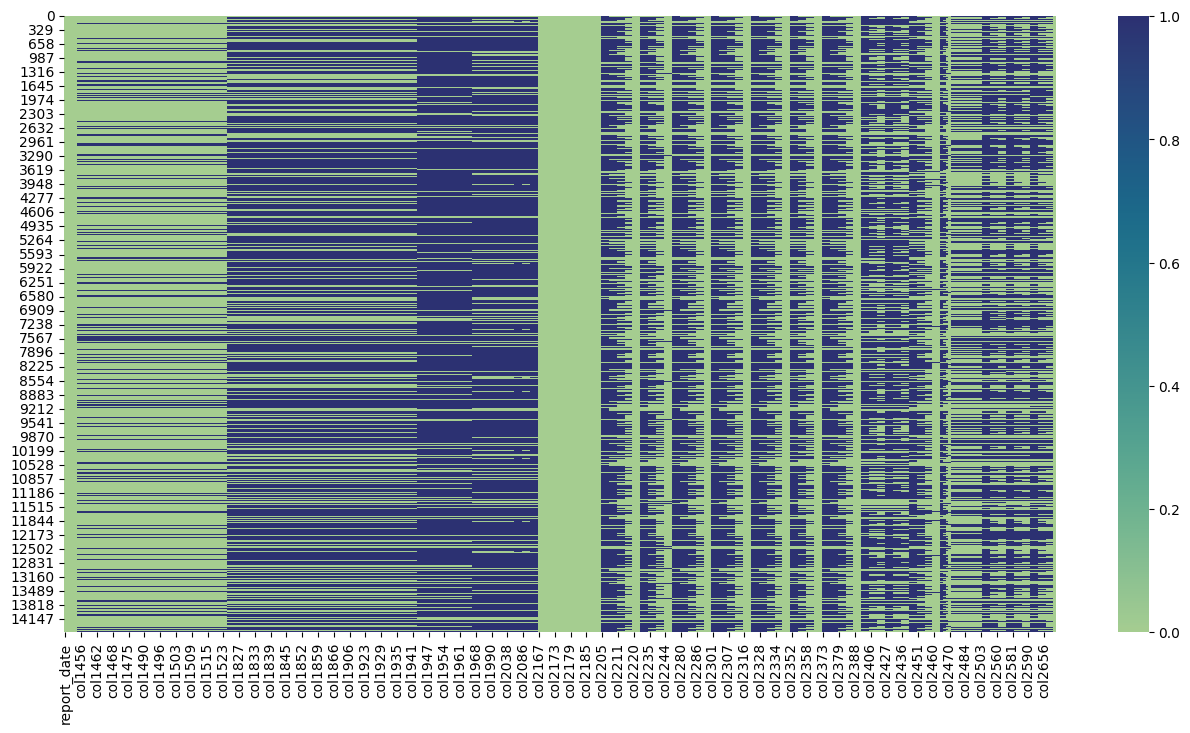

In [215]:
plt.figure(figsize = (16, 8))
sns.heatmap(df2.isnull(), cmap = 'crest')

Text(0.5, 1.0, 'Матрица корреляции')

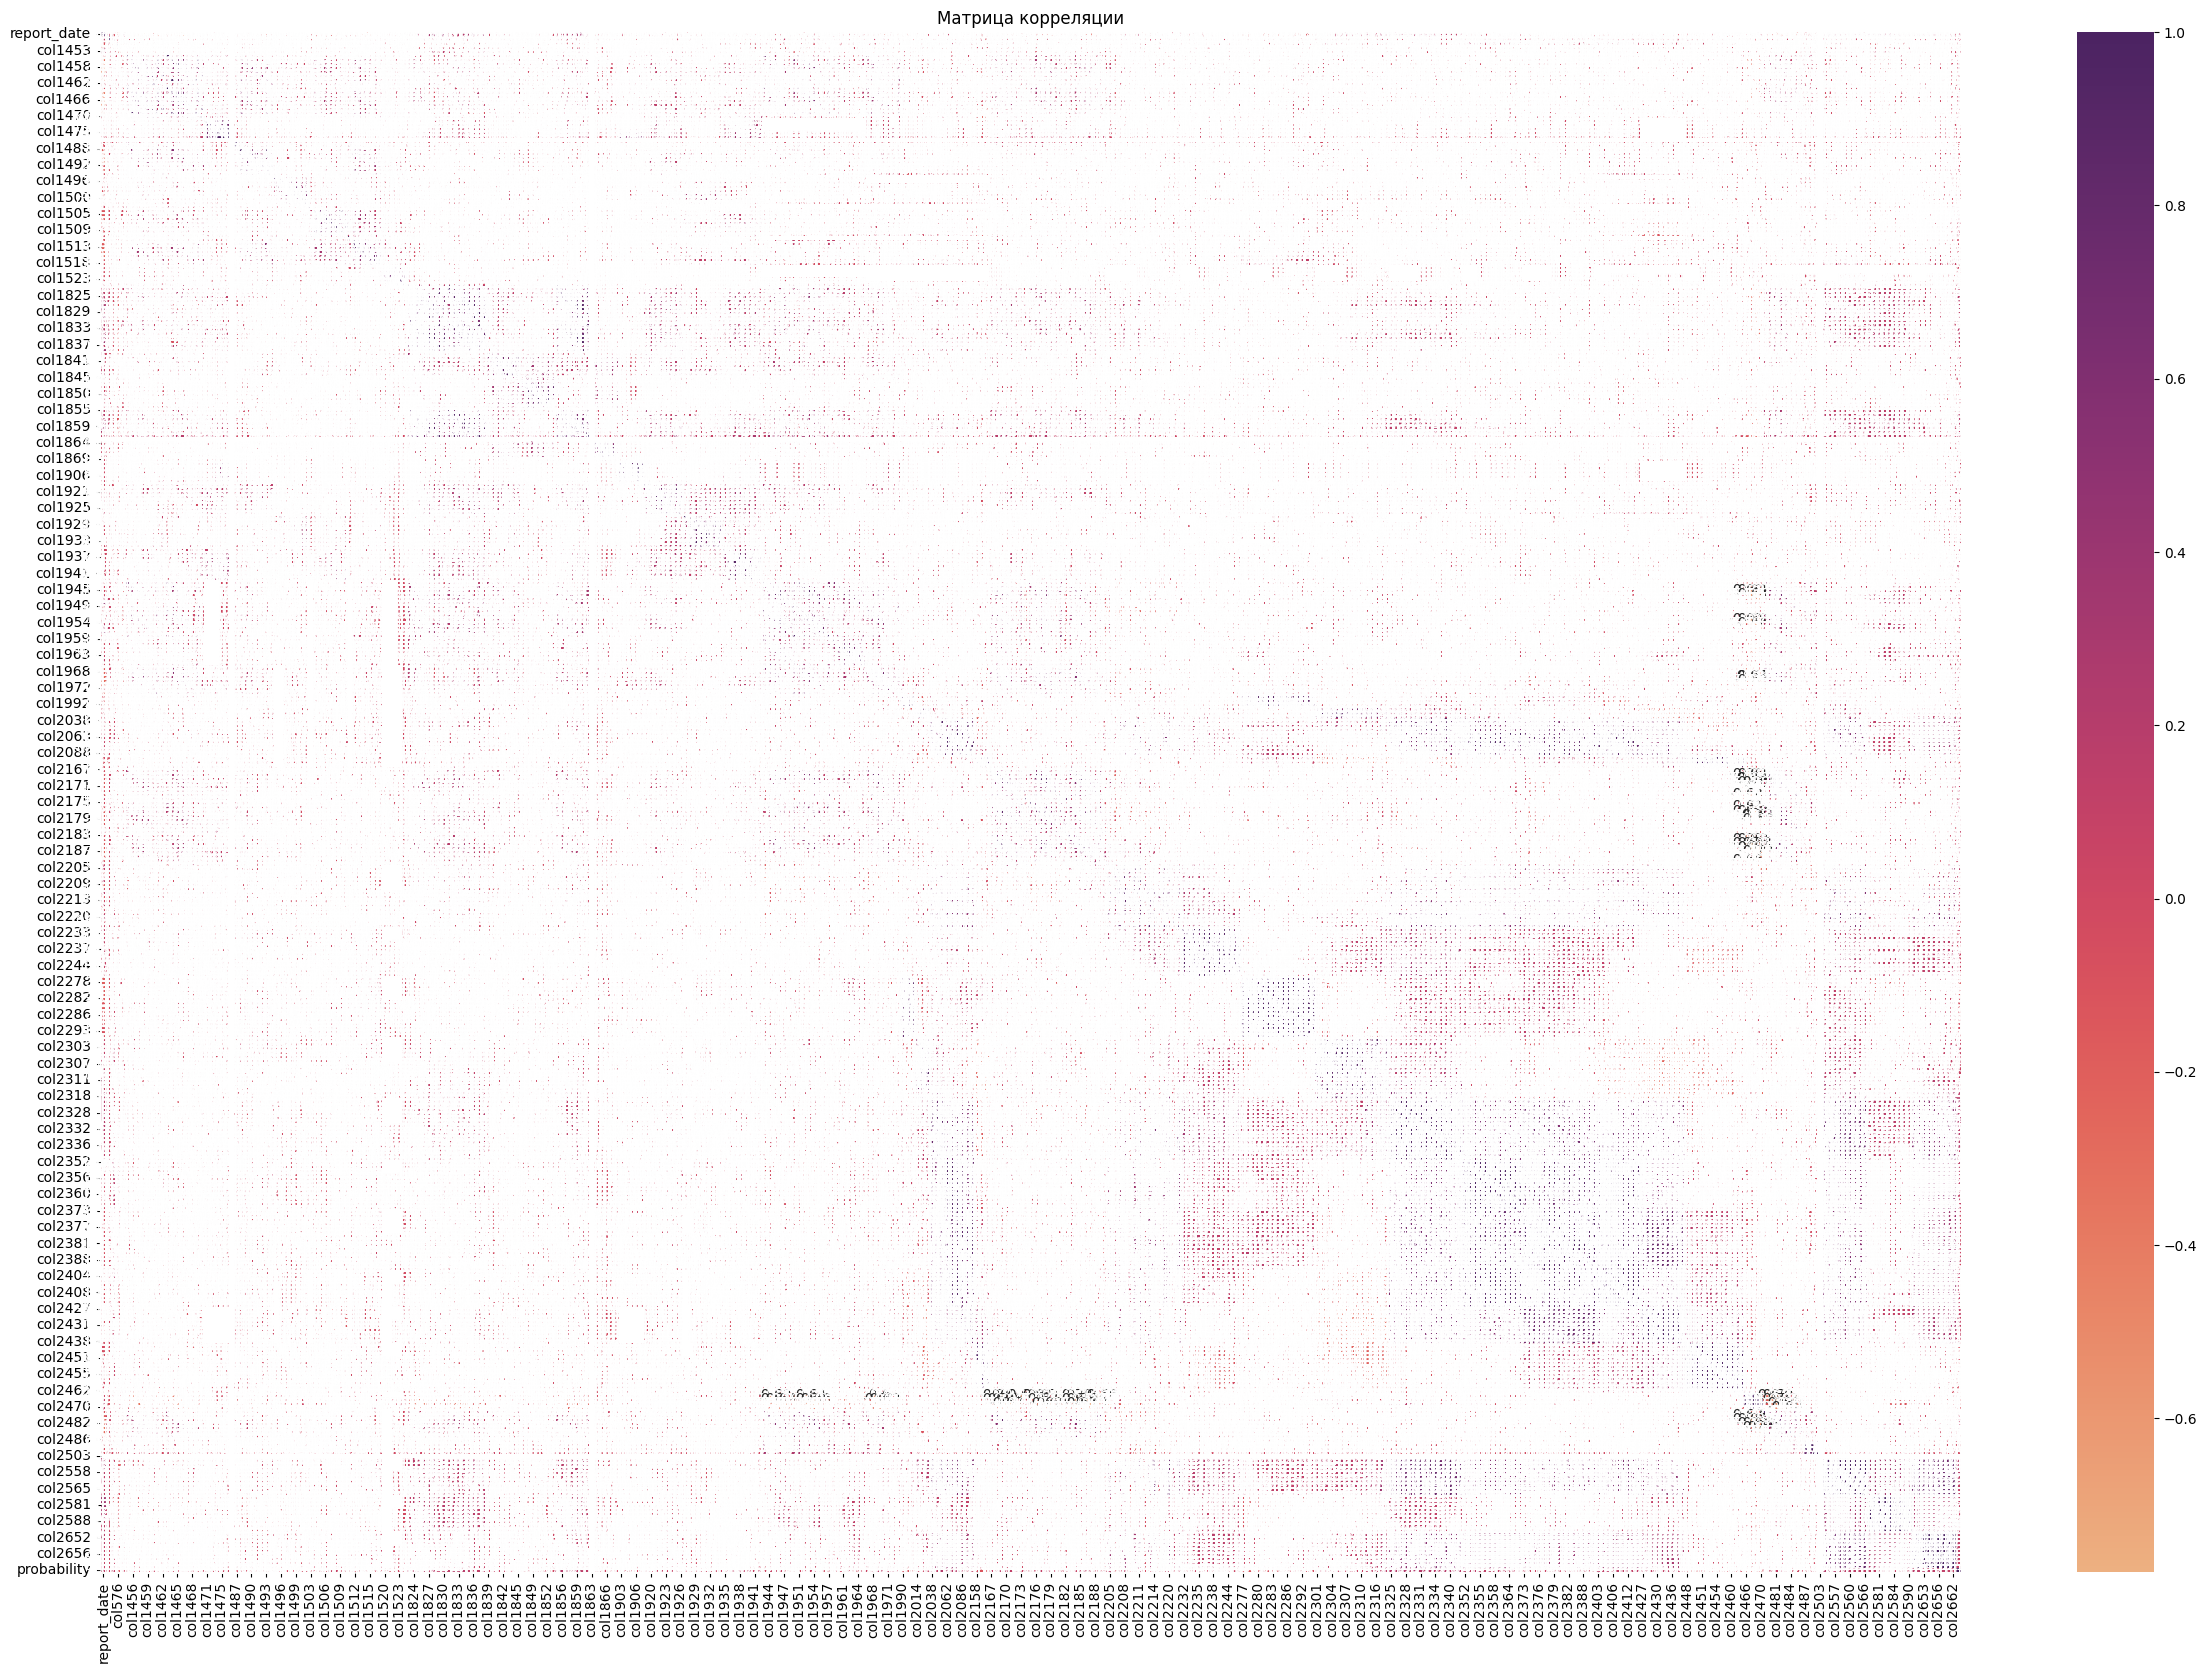

In [216]:
# матрица корреляции
plt.figure(figsize = (30,20))
sns.heatmap(df2.corr(), cmap = 'flare', annot = True)
plt.title('Матрица корреляции')

стало чуть получше, но всё равно ничего непонятно

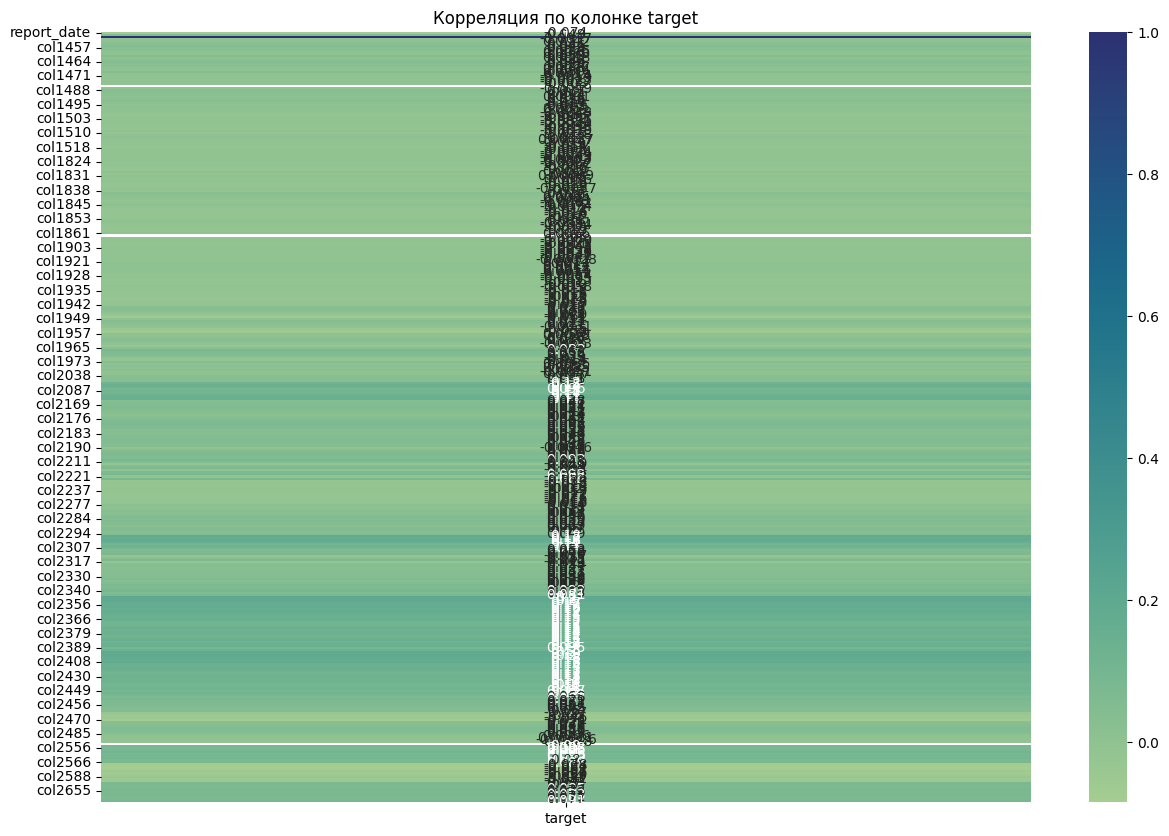

In [217]:
# визуализируем корреляцию столбцов со столбцом target
plt.figure(figsize=(15, 10))
cor_matrix = df2.corr()
target_corr = cor_matrix['target']
sns.heatmap(target_corr.to_frame(), annot=True, cmap='crest')
plt.title('Корреляция по колонке target')
plt.show()

Выводим корреляцию текстом, визуально не особо понятно

In [218]:
target_column = 'target'
target_corr = df2.corr()[target_column]

print(f"Корреляция с колонкой '{target_column}':")
print(target_corr)

Корреляция с колонкой 'target':
report_date   -0.073842
client_id      0.047855
target         1.000000
col576        -0.003665
col1453        0.004224
                 ...   
col2656        0.079170
col2660        0.082777
col2661        0.070938
col2662        0.076885
probability    0.090878
Name: target, Length: 377, dtype: float64


probability маловато коррелирует :(((

In [219]:
# вывод колонок с корреляцией больше 0.1
filt_corr = target_corr[target_corr > 0.1]

print(f"Колонки с корреляцией больше 0.1 с колонкой '{target_column}':")
for column, corr_value in filt_corr.items():
    print(f"Колонка: {column}, Корреляция: {corr_value:.2f}")

Колонки с корреляцией больше 0.1 с колонкой 'target':
Колонка: target, Корреляция: 1.00
Колонка: col2062, Корреляция: 0.12
Колонка: col2063, Корреляция: 0.15
Колонка: col2064, Корреляция: 0.14
Колонка: col2087, Корреляция: 0.11
Колонка: col2088, Корреляция: 0.11
Колонка: col2158, Корреляция: 0.13
Колонка: col2159, Корреляция: 0.16
Колонка: col2160, Корреляция: 0.15
Колонка: col2301, Корреляция: 0.18
Колонка: col2302, Корреляция: 0.17
Колонка: col2303, Корреляция: 0.18
Колонка: col2304, Корреляция: 0.16
Колонка: col2305, Корреляция: 0.11
Колонка: col2306, Корреляция: 0.13
Колонка: col2307, Корреляция: 0.10
Колонка: col2352, Корреляция: 0.20
Колонка: col2353, Корреляция: 0.20
Колонка: col2354, Корреляция: 0.20
Колонка: col2355, Корреляция: 0.17
Колонка: col2356, Корреляция: 0.17
Колонка: col2357, Корреляция: 0.18
Колонка: col2358, Корреляция: 0.16
Колонка: col2359, Корреляция: 0.17
Колонка: col2360, Корреляция: 0.17
Колонка: col2364, Корреляция: 0.14
Колонка: col2365, Корреляция: 0.15
Ко

In [220]:
# смотрим процент пропусков по колонкам с типом данных float64
float_col = df2.select_dtypes(include=['float64']).columns
for column in float_col:
    print(f"Колонка: {column}")
    print(f"Количество пропусков: {df2[column].isna().mean() * 100} %")
    print("-" * 40)

Колонка: col1455
Количество пропусков: 23.083840619811845 %
----------------------------------------
Колонка: col1456
Количество пропусков: 23.083840619811845 %
----------------------------------------
Колонка: col1457
Количество пропусков: 23.083840619811845 %
----------------------------------------
Колонка: col1458
Количество пропусков: 23.083840619811845 %
----------------------------------------
Колонка: col1459
Количество пропусков: 23.083840619811845 %
----------------------------------------
Колонка: col1460
Количество пропусков: 23.083840619811845 %
----------------------------------------
Колонка: col1461
Количество пропусков: 23.083840619811845 %
----------------------------------------
Колонка: col1462
Количество пропусков: 23.083840619811845 %
----------------------------------------
Колонка: col1463
Количество пропусков: 23.083840619811845 %
----------------------------------------
Колонка: col1464
Количество пропусков: 23.083840619811845 %
-------------------------------

In [221]:
# посмотрим колонку с id
df2['client_id'].nunique()

4817

-> всего в таблице данные о 4817-ти пользователях, которые посещали сайт в разное время. в целом колонку можно удалить, + корреляция с ней небольшая (0.04)

In [222]:
df2 = df2.drop(columns = ['client_id'])

In [223]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 376 entries, report_date to probability
dtypes: float64(372), int64(4)
memory usage: 41.5 MB


In [237]:
threshold = int(0.4 * len(df2.columns))  # оставляем стркои где заполнено 60% по колонкам
df3 = df2.dropna(thresh=threshold)

In [238]:
df3.shape

(9153, 376)

осталось 9153 строчки

In [239]:
df3.head(40)

report_date  target  col576  col1453  col1455  col1456  col1457  col1458  \
1            21       0       3        1      0.0      0.0      0.0      0.0   
3            19       0      17        0      1.0      1.0      1.0      1.0   
4            18       0      17        0      0.0      0.0      0.0      0.0   
5            24       0      17        0      0.0      0.0      1.0      1.0   
8            23       0       3        0      0.0      0.0      0.0      0.0   
10           12       0      17        0      0.0      2.0      2.0      2.0   
11           22       0      17        1      0.0      0.0      1.0      1.0   
12           23       0      17        1      0.0      0.0      0.0      0.0   
13           22       0      17        0      0.0      0.0      0.0      0.0   
16           24       0      17        0      0.0      0.0      0.0      0.0   
18           12       0      17        0      0.0      2.0      2.0      2.0   
22           20       0      16        0      0.0      1.0      1.0      1.0   
23           22       0      17        0      0.0      1.0      1.0      1.0   
24            6       0      17        0      NaN      NaN      NaN      NaN   
26           15       0      17        0      0.0      0.0      0.0      0.0   
28           20       0      17        1      0.0      0.0      0.0      0.0   
32           17       0      17        0      0.0      0.0      0.0      0.0   
35           21       0       3        1      0.0      0.0      0.0      0.0   
36           23       0      16        1      0.0      0.0      0.0      1.0   
38           21       0      17        0      0.0      0.0      0.0      0.0   
39           18       1      17        0      0.0      0.0      1.0      1.0   
42            6       0      17        0      NaN      NaN      NaN      NaN   
43           24       0      17        0      0.0      0.0      0.0      1.0   
44           15       0      17        0      0.0      0.0      0.0      0.0   
48           15       0      17        0      0.0      0.0      0.0      0.0   
50            6       0      17        0      NaN      NaN      NaN      NaN   
53           12       0      17        0      0.0      2.0      2.0      2.0   
54           23       0      17        0      0.0      0.0      0.0      0.0   
55           17       0      17        0      0.0      0.0      0.0      0.0   
56           11       0      17        0      NaN      NaN      NaN      NaN   
57           16       0      17        0      0.0      0.0      0.0      0.0   
58           18       0      17        0      0.0      0.0      0.0      0.0   
60           12       0      17        0      0.0      1.0      1.0      1.0   
61           15       0      17        0      0.0      0.0      0.0      0.0   
62            3       0      17        0      NaN      NaN      NaN      NaN   
65            6       0      17        0      NaN      NaN      NaN      NaN   
66           24       0      17        0      0.0      0.0      0.0      0.0   
67           18       0      17        0      0.0      0.0      0.0      0.0   
69           13       0      17        0      0.0      0.0      1.0      1.0   
70           19       0      17        0      0.0      0.0      0.0      0.0   

    col1459  col1460  ...     col2651     col2652     col2653     col2654  \
1       0.0      1.0  ...         NaN         NaN         NaN   7616803.0   
3       1.0      1.0  ...         NaN         NaN         NaN         NaN   
4       0.0      4.0  ...         NaN         NaN         NaN         NaN   
5       1.0      1.0  ...  10850000.0  10850000.0  10850000.0  10850000.0   
8       0.0      1.0  ...         NaN         NaN         NaN         NaN   
10      2.0      2.0  ...         NaN         NaN         NaN   4818792.0   
11      1.0      1.0  ...   5300000.0   5065000.0   5182500.0   5300000.0   
12      1.0      1.0  ...   4000000.0   4000000.0   4000000.0   4000000.0   
13      0.0      1.0  ...     

<Axes: >

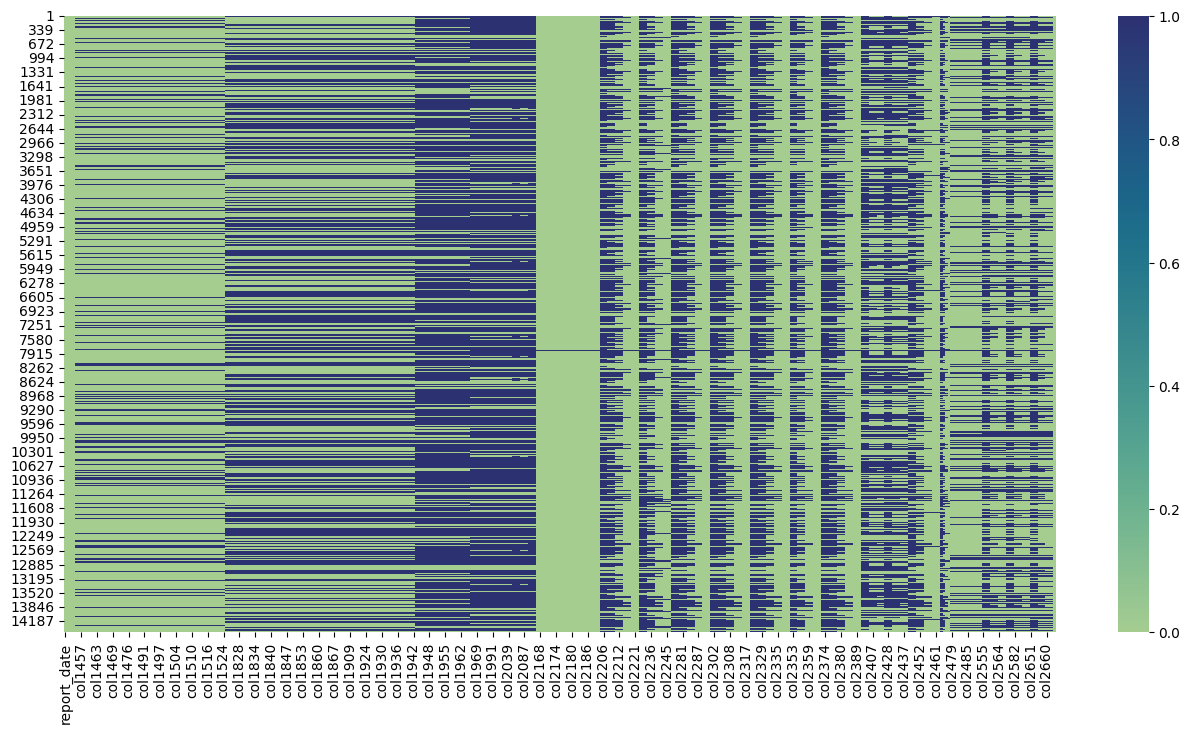

In [240]:
# пропуски
plt.figure(figsize = (16, 8))
sns.heatmap(df3.isnull(), cmap = 'crest')

-----------------------------------------------------------------------------------------------

In [243]:
dfdf = df3.copy(deep = True)

## Заполняем пропуски

In [244]:
# колонки с типом данных int заполняем с помощью knn
from sklearn.impute import KNNImputer

int_col = dfdf.select_dtypes(include = ['int64']).columns
imputer = KNNImputer(n_neighbors=3)
dfdf[int_col] = imputer.fit_transform(dfdf[int_col])

dfdf.head(10)

report_date  target  col576  col1453  col1455  col1456  col1457  col1458  \
1          21.0     0.0     3.0      1.0      0.0      0.0      0.0      0.0   
3          19.0     0.0    17.0      0.0      1.0      1.0      1.0      1.0   
4          18.0     0.0    17.0      0.0      0.0      0.0      0.0      0.0   
5          24.0     0.0    17.0      0.0      0.0      0.0      1.0      1.0   
8          23.0     0.0     3.0      0.0      0.0      0.0      0.0      0.0   
10         12.0     0.0    17.0      0.0      0.0      2.0      2.0      2.0   
11         22.0     0.0    17.0      1.0      0.0      0.0      1.0      1.0   
12         23.0     0.0    17.0      1.0      0.0      0.0      0.0      0.0   
13         22.0     0.0    17.0      0.0      0.0      0.0      0.0      0.0   
16         24.0     0.0    17.0      0.0      0.0      0.0      0.0      0.0   

    col1459  col1460  ...     col2651     col2652     col2653     col2654  \
1       0.0      1.0  ...         NaN         NaN         NaN   7616803.0   
3       1.0      1.0  ...         NaN         NaN         NaN         NaN   
4       0.0      4.0  ...         NaN         NaN         NaN         NaN   
5       1.0      1.0  ...  10850000.0  10850000.0  10850000.0  10850000.0   
8       0.0      1.0  ...         NaN         NaN         NaN         NaN   
10      2.0      2.0  ...         NaN         NaN         NaN   4818792.0   
11      1.0      1.0  ...   5300000.0   5065000.0   5182500.0   5300000.0   
12      1.0      1.0  ...   4000000.0   4000000.0   4000000.0   4000000.0   
13      0.0      1.0  ...         NaN         NaN         NaN         NaN   
16      0.0      1.0  ...         NaN         NaN         NaN         NaN   

       col2655     col2656     col2660     col2661     col2662  probability  
1    7616803.0   7616803.0   7616803.0   7616803.0   7616803.0     0.256261  
3          NaN         NaN         NaN         NaN         NaN     0.258682  
4          NaN         NaN         NaN         NaN         NaN     0.254164  
5   10850000.0  10850000.0  10850000.0  10850000.0  10850000.0     0.318994  
8          NaN         NaN         NaN         NaN         NaN     0.266285  
10   4818792.0   4818792.0   4818792.0   4818792.0   4818792.0     0.256261  
11   5065000.0   5182500.0   5300000.0   5065000.0   5182500.0     0.258209  
12   4000000.0   4000000.0   4000000.0   4000000.0   4000000.0     0.258447  
13         NaN         NaN         NaN         NaN         NaN     0.268364  
16         NaN         NaN         NaN         NaN         NaN     0.256919  

[10 rows x 376 columns]

In [ ]:
X = dfdf.copy(deep = True)

In [245]:
# заполнение колонок float с помощью IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

myImputer = IterativeImputer()
myImputer.fit(X)
myImputer_data = myImputer.transform(X)
df_Imputer_data = pd.DataFrame(myImputer_data,columns = dfdf.columns)

c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_bayes.py:293: RuntimeWarning: overflow encountered in square
  eigen_vals_ = S**2
c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_bayes.py:310: RuntimeWarning: invalid value encountered in divide
  gamma_ = np.sum((alpha_ * eigen_vals_) / (lambda_ + alpha_ * eigen_vals_))
c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_bayes.py:293: RuntimeWarning: overflow encountered in square
  eigen_vals_ = S**2
c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_bayes.py:310: RuntimeWarning: invalid value encountered in divide
  gamma_ = np.sum((alpha_ * eigen_vals_) / (lambda_ + alpha_ * eigen_vals_))


ValueError: Input X contains NaN.
BayesianRidge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [247]:
from sklearn.impute import SimpleImputer

In [265]:
# заполнение средним

imputer_mean = SimpleImputer(strategy='mean')
dfdf_mean = pd.DataFrame(imputer_mean.fit_transform(dfdf), columns=dfdf.columns)

dfdf_mean['target'] = dfdf_mean['target'].astype(int)
dfdf_mean

report_date  target  col576  col1453   col1455   col1456   col1457  \
0            21.0       0     3.0      1.0  0.000000  0.000000  0.000000   
1            19.0       0    17.0      0.0  1.000000  1.000000  1.000000   
2            18.0       0    17.0      0.0  0.000000  0.000000  0.000000   
3            24.0       0    17.0      0.0  0.000000  0.000000  1.000000   
4            23.0       0     3.0      0.0  0.000000  0.000000  0.000000   
...           ...     ...     ...      ...       ...       ...       ...   
9148         10.0       0    17.0      0.0  0.017601  0.155261  0.321424   
9149         18.0       0     3.0      0.0  0.000000  0.000000  0.000000   
9150         18.0       0    17.0      0.0  0.000000  0.000000  0.000000   
9151         12.0       1    17.0      0.0  0.000000  1.000000  1.000000   
9152         13.0       0    17.0      0.0  0.000000  0.000000  1.000000   

       col1458   col1459   col1460  ...       col2651       col2652  \
0     0.000000  0.000000  1.000000  ...  7.128509e+06  7.053545e+06   
1     1.000000  1.000000  1.000000  ...  7.128509e+06  7.053545e+06   
2     0.000000  0.000000  4.000000  ...  7.128509e+06  7.053545e+06   
3     1.000000  1.000000  1.000000  ...  1.085000e+07  1.085000e+07   
4     0.000000  0.000000  1.000000  ...  7.128509e+06  7.053545e+06   
...        ...       ...       ...  ...           ...           ...   
9148  0.480231  0.904505  1.543019  ...  4.300000e+06  4.300000e+06   
9149  0.000000  0.000000  1.000000  ...  7.128509e+06  7.053545e+06   
9150  0.000000  0.000000  2.000000  ...  7.128509e+06  7.053545e+06   
9151  1.000000  1.000000  1.000000  ...  7.128509e+06  7.053545e+06   
9152  1.000000  1.000000  1.000000  ...  7.128509e+06  7.053545e+06   

           col2653       col2654       col2655       col2656       col2660  \
0     7.091271e+06  7.616803e+06  7.616803e+06  7.616803e+06  7.616803e+06   
1     7.091271e+06  6.962399e+06  6.852454e+06  6.906976e+06  7.020391e+06   
2     7.091271e+06  6.962399e+06  6.852454e+06  6.906976e+06  7.020391e+06   
3     1.085000e+07  1.085000e+07  1.085000e+07  1.085000e+07  1.085000e+07   
4     7.091271e+06  6.962399e+06  6.852454e+06  6.906976e+06  7.020391e+06   
...            ...           ...           ...           ...           ...   
9148  4.300000e+06  4.300000e+06  4.300000e+06  4.300000e+06  4.300000e+06   
9149  7.091271e+06  1.200000e+07  1.200000e+07  1.200000e+07  1.200000e+07   
9150  7.091271e+06  1.014500e+07  1.014500e+07  1.014500e+07  1.014500e+07   
9151  7.091271e+06  6.962399e+06  6.852454e+06  6.906976e+06  7.020391e+06   
9152  7.091271e+06  6.962399e+06  6.852454e+06  6.906976e+06  7.020391e+06   

           col2661       col2662  probability  
0     7.616803e+06  7.616803e+06     0.256261  
1     6.877451e+06  6.947230e+06     0.258682  
2     6.877451e+06  6.947230e+06     0.254164  
3     1.085000e+07  1.085000e+07     0.318994  
4     6.877451e+06  6.947230e+06     0.266285  
...            ...           ...          ...  
9148  4.300000e+06  4.300000e+06     0.256261  
9149  1.200000e+07  1.200000e+07     0.257017  
9150  1.014500e+07  1.014500e+07     0.257789  
9151  6.877451e+06  6.947230e+06     0.260005  
9152  6.877451e+06  6.947230e+06     0.293904  

[9153 rows x 376 columns]

In [266]:
# заполнение медианой

imputer_median = SimpleImputer(strategy='median')
dfdf_median = pd.DataFrame(imputer_median.fit_transform(dfdf), columns=dfdf.columns)
dfdf_median['target'] = dfdf_median['target'].astype(int)
dfdf_median

report_date  target  col576  col1453  col1455  col1456  col1457  \
0            21.0       0     3.0      1.0      0.0      0.0      0.0   
1            19.0       0    17.0      0.0      1.0      1.0      1.0   
2            18.0       0    17.0      0.0      0.0      0.0      0.0   
3            24.0       0    17.0      0.0      0.0      0.0      1.0   
4            23.0       0     3.0      0.0      0.0      0.0      0.0   
...           ...     ...     ...      ...      ...      ...      ...   
9148         10.0       0    17.0      0.0      0.0      0.0      0.0   
9149         18.0       0     3.0      0.0      0.0      0.0      0.0   
9150         18.0       0    17.0      0.0      0.0      0.0      0.0   
9151         12.0       1    17.0      0.0      0.0      1.0      1.0   
9152         13.0       0    17.0      0.0      0.0      0.0      1.0   

      col1458  col1459  col1460  ...     col2651     col2652     col2653  \
0         0.0      0.0      1.0  ...   6448555.4   6391554.0   6421782.5   
1         1.0      1.0      1.0  ...   6448555.4   6391554.0   6421782.5   
2         0.0      0.0      4.0  ...   6448555.4   6391554.0   6421782.5   
3         1.0      1.0      1.0  ...  10850000.0  10850000.0  10850000.0   
4         0.0      0.0      1.0  ...   6448555.4   6391554.0   6421782.5   
...       ...      ...      ...  ...         ...         ...         ...   
9148      0.0      1.0      1.0  ...   4300000.0   4300000.0   4300000.0   
9149      0.0      0.0      1.0  ...   6448555.4   6391554.0   6421782.5   
9150      0.0      0.0      2.0  ...   6448555.4   6391554.0   6421782.5   
9151      1.0      1.0      1.0  ...   6448555.4   6391554.0   6421782.5   
9152      1.0      1.0      1.0  ...   6448555.4   6391554.0   6421782.5   

         col2654     col2655     col2656     col2660     col2661     col2662  \
0      7616803.0   7616803.0   7616803.0   7616803.0   7616803.0   7616803.0   
1      6247433.0   6169623.0   6240000.0   6350000.0   6224000.0   6300000.0   
2      6247433.0   6169623.0   6240000.0   6350000.0   6224000.0   6300000.0   
3     10850000.0  10850000.0  10850000.0  10850000.0  10850000.0  10850000.0   
4      6247433.0   6169623.0   6240000.0   6350000.0   6224000.0   6300000.0   
...          ...         ...         ...         ...         ...         ...   
9148   4300000.0   4300000.0   4300000.0   4300000.0   4300000.0   4300000.0   
9149  12000000.0  12000000.0  12000000.0  12000000.0  12000000.0  12000000.0   
9150  10145000.0  10145000.0  10145000.0  10145000.0  10145000.0  10145000.0   
9151   6247433.0   6169623.0   6240000.0   6350000.0   6224000.0   6300000.0   
9152   6247433.0   6169623.0   6240000.0   6350000.0   6224000.0   6300000.0   

      probability  
0        0.256261  
1        0.258682  
2        0.254164  
3        0.318994  
4        0.266285  
...           ...  
9148     0.256261  
9149     0.257017  
9150     0.257789  
9151     0.260005  
9152     0.293904  

[9153 rows x 376 columns]

In [267]:
# заполнение модой

imputer_moda = SimpleImputer(strategy='most_frequent')
dfdf_moda = pd.DataFrame(imputer_moda.fit_transform(dfdf), columns=dfdf.columns)
dfdf_moda['target'] = dfdf_moda['target'].astype(int)
dfdf_moda

report_date  target  col576  col1453  col1455  col1456  col1457  \
0            21.0       0     3.0      1.0      0.0      0.0      0.0   
1            19.0       0    17.0      0.0      1.0      1.0      1.0   
2            18.0       0    17.0      0.0      0.0      0.0      0.0   
3            24.0       0    17.0      0.0      0.0      0.0      1.0   
4            23.0       0     3.0      0.0      0.0      0.0      0.0   
...           ...     ...     ...      ...      ...      ...      ...   
9148         10.0       0    17.0      0.0      0.0      0.0      0.0   
9149         18.0       0     3.0      0.0      0.0      0.0      0.0   
9150         18.0       0    17.0      0.0      0.0      0.0      0.0   
9151         12.0       1    17.0      0.0      0.0      1.0      1.0   
9152         13.0       0    17.0      0.0      0.0      0.0      1.0   

      col1458  col1459  col1460  ...     col2651     col2652     col2653  \
0         0.0      0.0      1.0  ...   3000000.0   3000000.0   3000000.0   
1         1.0      1.0      1.0  ...   3000000.0   3000000.0   3000000.0   
2         0.0      0.0      4.0  ...   3000000.0   3000000.0   3000000.0   
3         1.0      1.0      1.0  ...  10850000.0  10850000.0  10850000.0   
4         0.0      0.0      1.0  ...   3000000.0   3000000.0   3000000.0   
...       ...      ...      ...  ...         ...         ...         ...   
9148      0.0      1.0      1.0  ...   4300000.0   4300000.0   4300000.0   
9149      0.0      0.0      1.0  ...   3000000.0   3000000.0   3000000.0   
9150      0.0      0.0      2.0  ...   3000000.0   3000000.0   3000000.0   
9151      1.0      1.0      1.0  ...   3000000.0   3000000.0   3000000.0   
9152      1.0      1.0      1.0  ...   3000000.0   3000000.0   3000000.0   

         col2654     col2655     col2656     col2660     col2661     col2662  \
0      7616803.0   7616803.0   7616803.0   7616803.0   7616803.0   7616803.0   
1      3000000.0   3000000.0   3000000.0   3000000.0   3000000.0   3000000.0   
2      3000000.0   3000000.0   3000000.0   3000000.0   3000000.0   3000000.0   
3     10850000.0  10850000.0  10850000.0  10850000.0  10850000.0  10850000.0   
4      3000000.0   3000000.0   3000000.0   3000000.0   3000000.0   3000000.0   
...          ...         ...         ...         ...         ...         ...   
9148   4300000.0   4300000.0   4300000.0   4300000.0   4300000.0   4300000.0   
9149  12000000.0  12000000.0  12000000.0  12000000.0  12000000.0  12000000.0   
9150  10145000.0  10145000.0  10145000.0  10145000.0  10145000.0  10145000.0   
9151   3000000.0   3000000.0   3000000.0   3000000.0   3000000.0   3000000.0   
9152   3000000.0   3000000.0   3000000.0   3000000.0   3000000.0   3000000.0   

      probability  
0        0.256261  
1        0.258682  
2        0.254164  
3        0.318994  
4        0.266285  
...           ...  
9148     0.256261  
9149     0.257017  
9150     0.257789  
9151     0.260005  
9152     0.293904  

[9153 rows x 376 columns]

# Моделька (логистическая регрессия)

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [268]:
# dfdf_mean
train = dfdf_mean

X = dfdf_mean.drop(columns = ['target', 'probability'])
y = dfdf_mean['target']

# разбиение на тренировочную и тестовую выборки (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# модель и её обучение
model  = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

# предсказывание на тест. выборке
y_pred = model.predict(X_test)

# точность модельки
accuracy = accuracy_score(y_test, y_pred)
print(f'точность модельки: {accuracy}')

точность модельки: 0.9646758922068464


c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [269]:
# dfdf_median
train = dfdf_median

X = dfdf_median.drop(columns = ['target', 'probability'])
y = dfdf_median['target']

# разбиение на тренировочную и тестовую выборки (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# модель и её обучение
model  = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

# предсказывание на тест. выборке
y_pred = model.predict(X_test)

# точность модельки
accuracy = accuracy_score(y_test, y_pred)
print(f'точность модельки: {accuracy}')

точность модельки: 0.9635833940276766


c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [270]:
# dfdf_moda
train = dfdf_moda

X = dfdf_moda.drop(columns = ['target', 'probability'])
y = dfdf_moda['target']

# разбиение на тренировочную и тестовую выборки (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# модель и её обучение
model  = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

# предсказывание на тест. выборке
y_pred = model.predict(X_test)

# точность модельки
accuracy = accuracy_score(y_test, y_pred)
print(f'точность модельки: {accuracy}')

точность модельки: 0.9643117261471231


c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-------------------------------------------------------

c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC: 0.6166725753745607


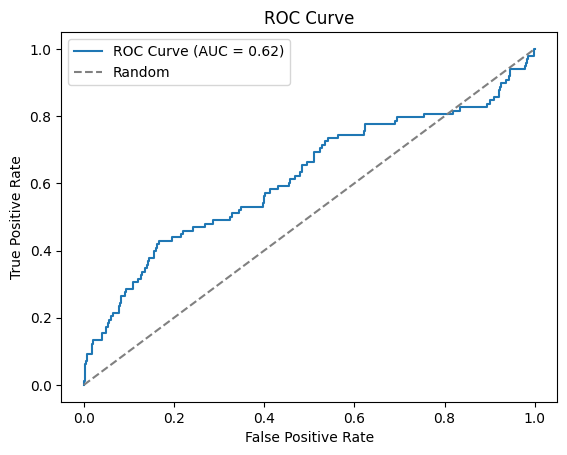

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# на среднем
X = dfdf_mean.drop(columns=['target', 'probability'])
y = dfdf_mean['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred_proba = model.predict_proba(X_test)[:, 1]


roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC: 0.5985264196312966


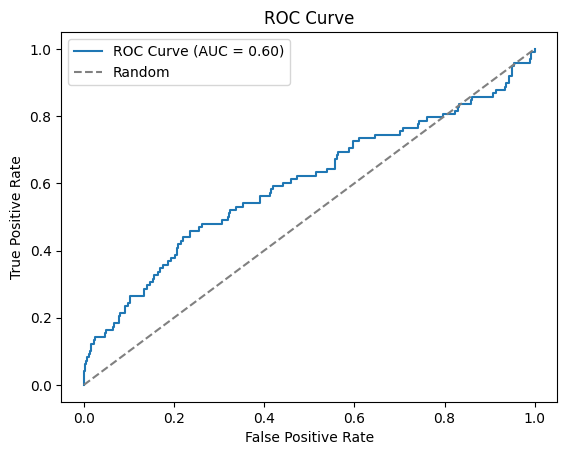

In [277]:
# на медиане
X = dfdf_median.drop(columns=['target', 'probability'])
y = dfdf_median['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred_proba = model.predict_proba(X_test)[:, 1]


roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

ROC-AUC: 0.656741321906406


c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


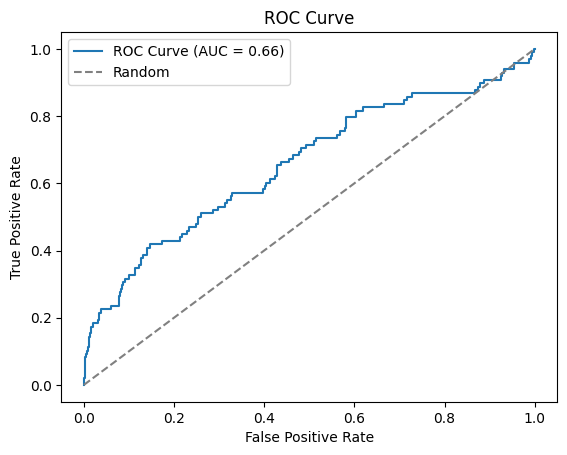

In [276]:
# на моде
X = dfdf_moda.drop(columns=['target', 'probability'])
y = dfdf_moda['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred_proba = model.predict_proba(X_test)[:, 1]


roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

-----------------------------------------------------------------------------------------------